<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

# Modeling Evaluation

## Contents:
- [Data Sets](#Datasets)
- [Benchmark RMSE](#Benchmark-RMSE-based-on-average-saleprice-of-all-houses)
- [Model Preparation](#Modeling-Preparation)
- [Linear Regression](#Linear-Regression)
- [RidgeCV Regression](#RidgeCV-Regression)
- [LassoCV Regression](#LassoCV-Regression)
- [Pipeline and Gridsearch](#Pipeline-and-Gridsearch)
- [-Ridge Regression](#Ridge-Regression)
- [-Lasso Regression](#Lasso-Regression)
- [Evaluate LassoCV model](#Evaluate-LassoCV-model)
- [Lasso Regression with Polynomial Features](#Using-LassoCV-Regression-with-polynomial-features)
- [Elastic Net Regression](#Elastic-Net-Regression)
- [Ridge and Lasso residuals](#Compare-Ridge-and-Lasso-residuals)
- [Conclusion and Recommendation](#Conclusion-and-Recommendation)
- [Kaggle Submission](#Kaggle-Submission)
- [Saving Model](#Saving-Model)

## Datasets
* [`train_clean.csv`](./datasets/train_clean.csv): Training Clean Set
* [`test_clean.csv`](./datasets/test_clean.csv): Testing Clean Set

### All libraries imports

In [4]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Set style
plt.style.use('fivethirtyeight')

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Loading Data

In [5]:
#Load data in dataframe
train_clean = pd.read_csv('./datasets/train_clean.csv')
test_clean = pd.read_csv('./datasets/test_clean.csv')

In [6]:
train_clean.shape # 34 columns and 2011 rows

(2011, 34)

In [7]:
train_clean.columns

Index(['saleprice', 'age', 'neighborhood_order', 'local_conditions',
       'was_remodeled', 'overall_qual', 'house_style_order_1.5',
       'house_style_order_2.0', 'exter_qual', 'exterior_1n2',
       'bldg_type_duplex', 'bldg_type_twnhs', 'bldg_type_twnhse',
       'bldg_type_2fmcon', 'roof_style_hip', 'residential', 'functional',
       'lot_frontage', 'lot_area', 'outside_porch_sf', 'garage_fin_area',
       'garage_cars', 'paved_drive', 'bsmt_qual', 'bsmtfin_type_sf',
       'bsmt_exposure', 'heating_qc', 'kitchen_qual', 'fireplace_qu',
       'all_floors_sf', 'totrms_abvgrd', 'room_size', 'all_baths',
       'gr_liv_area'],
      dtype='object')

In [8]:
test_clean.shape # 34 columns and 878 rows

(878, 34)

In [9]:
test_clean.columns

Index(['id', 'age', 'neighborhood_order', 'local_conditions', 'was_remodeled',
       'overall_qual', 'house_style_order_1.5', 'house_style_order_2.0',
       'exter_qual', 'exterior_1n2', 'bldg_type_duplex', 'bldg_type_twnhs',
       'bldg_type_twnhse', 'bldg_type_2fmcon', 'roof_style_hip', 'residential',
       'functional', 'lot_frontage', 'lot_area', 'outside_porch_sf',
       'garage_fin_area', 'garage_cars', 'paved_drive', 'bsmt_qual',
       'bsmtfin_type_sf', 'bsmt_exposure', 'heating_qc', 'kitchen_qual',
       'fireplace_qu', 'all_floors_sf', 'totrms_abvgrd', 'room_size',
       'all_baths', 'gr_liv_area'],
      dtype='object')

In [10]:
train_clean.rename(columns={'saleprice' : 'saleprice',
                    'age': 'age',
                    'neighborhood_order': 'neighborhood_quality',
                    'local_conditions': 'local_features',
                    'was_remodeled': 'remodeled',
                    'overall_qual': 'overall_quality',
                    'house_style_order_1.5': 'single_story', 
                    'house_style_order_2.0': 'double_story',
                    'exter_qual': 'external_quality',
                    'exterior_1n2': 'external_features', 
                    'bldg_type_duplex': 'duplex_building',
                    'bldg_type_twnhs': 'townhouse_building',
                    'bldg_type_twnhse': 'townhouse_end_building',
                    'bldg_type_2fmcon': 'two_family_building', 
                    'roof_style_hip': 'roof_quality',
                    'mas_vnr_ord': 'masonry_veneer',
                    'functional': 'functional_building', 
                    'lot_frontage': 'lot_frontage', 
                    'lot_area': 'lot_size',
                   'outside_porch_sf': 'outside_space',
                    'garage_fin_area': 'garage_area',
                    'garage_cars': 'garage_cars', 
                    'paved_drive': 'paved_driveway',
                    'bsmt_qual': 'basement_quality',
                    'bsmtfin_type_sf': 'basement_size', 
                    'bsmt_exposure': 'basement_ceiling',
                    'heating_qc': 'heating_quality',
                    'kitchen_qual': 'kitchen_quality', 
                    'fireplace_qu': 'fireplace_quality',
                    'all_floors_sf': 'floors_size', 
                    'totrms_abvgrd': 'rooms_above_size', 
                    'room_size': 'room_size', 
 #                   'pricepsf': 'price_psf', 
                    'all_baths': 'bath_rooms', 
                    'gr_liv_area': 'ground_living_area',
                   }, inplace=True)

# Display the new columns 
train_clean.columns

Index(['saleprice', 'age', 'neighborhood_quality', 'local_features',
       'remodeled', 'overall_quality', 'single_story', 'double_story',
       'external_quality', 'external_features', 'duplex_building',
       'townhouse_building', 'townhouse_end_building', 'two_family_building',
       'roof_quality', 'residential', 'functional_building', 'lot_frontage',
       'lot_size', 'outside_space', 'garage_area', 'garage_cars',
       'paved_driveway', 'basement_quality', 'basement_size',
       'basement_ceiling', 'heating_quality', 'kitchen_quality',
       'fireplace_quality', 'floors_size', 'rooms_above_size', 'room_size',
       'bath_rooms', 'ground_living_area'],
      dtype='object')

In [11]:
test_clean.rename(columns={'id': 'id',
                           'age': 'age',
                    'neighborhood_order': 'neighborhood_quality',
                    'local_conditions': 'local_features',
                    'was_remodeled': 'remodeled',
                    'overall_qual': 'overall_quality',
                    'house_style_order_1.5': 'single_story', 
                    'house_style_order_2.0': 'double_story',
                    'exter_qual': 'external_quality',
                    'exterior_1n2': 'external_features', 
                    'bldg_type_duplex': 'duplex_building',
                    'bldg_type_twnhs': 'townhouse_building',
                    'bldg_type_twnhse': 'townhouse_end_building',
                    'bldg_type_2fmcon': 'two_family_building', 
                    'roof_style_hip': 'roof_quality',
                    'mas_vnr_ord': 'masonry_veneer',
                    'functional': 'functional_building', 
                    'lot_frontage': 'lot_frontage', 
                    'lot_area': 'lot_size',
                   'outside_porch_sf': 'outside_space',
                    'garage_fin_area': 'garage_area',
                    'garage_cars': 'garage_cars', 
                    'paved_drive': 'paved_driveway',
                    'bsmt_qual': 'basement_quality',
                    'bsmtfin_type_sf': 'basement_size', 
                    'bsmt_exposure': 'basement_ceiling',
                    'heating_qc': 'heating_quality',
                    'kitchen_qual': 'kitchen_quality', 
                    'fireplace_qu': 'fireplace_quality',
                    'all_floors_sf': 'floors_size', 
                    'totrms_abvgrd': 'rooms_above_size', 
                    'room_size': 'room_size', 
                    'pricepsf': 'price_psf', 
                    'all_baths': 'bath_rooms', 
                    'gr_liv_area': 'ground_living_area',
                   }, inplace=True)

# Display the new columns 
test_clean.columns

Index(['id', 'age', 'neighborhood_quality', 'local_features', 'remodeled',
       'overall_quality', 'single_story', 'double_story', 'external_quality',
       'external_features', 'duplex_building', 'townhouse_building',
       'townhouse_end_building', 'two_family_building', 'roof_quality',
       'residential', 'functional_building', 'lot_frontage', 'lot_size',
       'outside_space', 'garage_area', 'garage_cars', 'paved_driveway',
       'basement_quality', 'basement_size', 'basement_ceiling',
       'heating_quality', 'kitchen_quality', 'fireplace_quality',
       'floors_size', 'rooms_above_size', 'room_size', 'bath_rooms',
       'ground_living_area'],
      dtype='object')

In [12]:
pd.set_option('max_columns', None)
df = train_clean.copy()
df.head()

,saleprice,age,neighborhood_quality,local_features,remodeled,overall_quality,single_story,double_story,external_quality,external_features,duplex_building,townhouse_building,townhouse_end_building,two_family_building,roof_quality,residential,functional_building,lot_frontage,lot_size,outside_space,garage_area,garage_cars,paved_driveway,basement_quality,basement_size,basement_ceiling,heating_quality,kitchen_quality,fireplace_quality,floors_size,rooms_above_size,room_size,bath_rooms,ground_living_area
0,130500,34,1,1,1,6,0,1,4,7,0,0,0,0,0,1,8,41.5,13517,44,950.0,2.0,2,3,3198.0,1,5,4,0,1479,6,246.500000,2.5,1479
1,220000,13,3,2,1,7,0,1,4,10,0,0,0,0,0,1,8,43.0,11492,74,1118.0,2.0,2,4,3822.0,1,5,4,3,2122,8,265.250000,3.5,2122
2,109000,57,2,2,1,5,0,0,3,10,0,0,0,0,0,1,8,68.0,7922,52,246.0,1.0,2,3,4386.0,1,3,4,0,1057,5,211.400000,2.0,1057
3,174000,4,4,2,1,5,0,1,3,10,0,0,0,0,0,1,8,73.0,9802,100,1200.0,2.0,2,4,0.0,1,4,3,0,1444,7,206.285714,2.5,1444
4,138500,110,3,2,1,6,1,0,3,7,0,0,0,0,0,1,8,82.0,14235,59,484.0,2.0,0,2,0.0,1,3,3,0,1445,6,240.833333,2.0,1445


In [13]:
df.describe()

,saleprice,age,neighborhood_quality,local_features,remodeled,overall_quality,single_story,double_story,external_quality,external_features,duplex_building,townhouse_building,townhouse_end_building,two_family_building,roof_quality,residential,functional_building,lot_frontage,lot_size,outside_space,garage_area,garage_cars,paved_driveway,basement_quality,basement_size,basement_ceiling,heating_quality,kitchen_quality,fireplace_quality,floors_size,rooms_above_size,room_size,bath_rooms,ground_living_area
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,176167.133267,36.530085,2.400298,1.888613,0.459970,6.052710,0.139234,0.297364,3.383391,7.726504,0.036300,0.034311,0.080060,0.022874,0.181999,0.989060,7.841372,68.252014,9894.931875,179.053705,888.686226,1.752362,1.830433,3.464943,2335.017404,1.601193,4.142218,3.494281,1.718548,1468.755843,6.373943,230.605118,2.192690,1474.093983
std,68832.228258,30.005861,1.004160,0.398411,0.498519,1.369245,0.346277,0.457212,0.563131,2.030560,0.187083,0.182073,0.271453,0.149540,0.385940,0.104046,0.686906,20.689066,6483.641975,155.568261,638.238172,0.752004,0.539568,0.888925,2444.360247,1.053815,0.966433,0.646723,1.794782,457.943112,1.490066,44.486729,0.777988,460.240654
min,12789.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,334.000000,2.000000,120.000000,1.000000,334.000000
25%,129225.000000,8.000000,2.000000,2.000000,0.000000,5.000000,0.000000,0.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,58.500000,7461.000000,48.000000,384.000000,1.000000,2.000000,3.000000,0.000000,1.000000,3.000000,3.000000,0.000000,1120.000000,5.000000,198.182540,1.500000,1124.000000
50%,160000.000000,34.000000,2.000000,2.000000,0.000000,6.000000,0.000000,0.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,68.000000,9340.000000,162.000000,728.000000,2.000000,2.000000,4.000000,1824.000000,1.000000,5.000000,3.000000,1.000000,1430.000000,6.000000,226.222222,2.000000,1433.000000
75%,210650.000000,55.000000,3.000000,2.000000,1.000000,7.000000,0.000000,1.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,80.000000,11349.000000,264.000000,1290.000000,2.000000,2.000000,4.000000,3904.500000,2.000000,5.000000,4.000000,4.000000,1712.500000,7.000000,256.428571,2.500000,1716.000000
max,418000.000000,136.000000,4.000000,4.000000,1.000000,10.000000,1.000000,1.000000,5.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,200.000000,159000.000000,1424.000000,4068.000000,5.000000,2.000000,5.000000,12348.000000,4.000000,5.000000,5.000000,5.000000,3820.000000,14.000000,524.571429,6.000000,3820.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   saleprice               2011 non-null   int64  
 1   age                     2011 non-null   int64  
 2   neighborhood_quality    2011 non-null   int64  
 3   local_features          2011 non-null   int64  
 4   remodeled               2011 non-null   int64  
 5   overall_quality         2011 non-null   int64  
 6   single_story            2011 non-null   int64  
 7   double_story            2011 non-null   int64  
 8   external_quality        2011 non-null   int64  
 9   external_features       2011 non-null   int64  
 10  duplex_building         2011 non-null   int64  
 11  townhouse_building      2011 non-null   int64  
 12  townhouse_end_building  2011 non-null   int64  
 13  two_family_building     2011 non-null   int64  
 14  roof_quality            2011 non-null   

In [15]:
# Check any missing values for train set
null_cols = df.isnull().sum()
null_cols[null_cols > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [16]:
# Check any missing values for test set
null_cols = test_clean.isnull().sum()
null_cols[null_cols > 0].sort_values(ascending=False)

Series([], dtype: int64)

### Benchmark RMSE based on average saleprice of all houses

Baseline score for the following model reference by using the Mean Root Square Error of the mean building sale price. We will be using various models to check which models fit the best.

In [17]:
df['y_avgsaleprice'] = df['saleprice'].mean()

In [18]:
RMSE = metrics.mean_squared_error(y_true=df['saleprice'], y_pred=df['y_avgsaleprice'] )**.5
print(f'Mean Root Square Error in dollars: {round(RMSE,2)}.')

Mean Root Square Error in dollars: 68815.11.


## Modeling Preparation

### Create predictor and target variables. Standardize the predictors.

In [19]:
# Create X and y variables for train set to see which model perform the best
X = df.drop(columns=['saleprice', 'y_avgsaleprice'])
y = df['saleprice']

# This test set is to be used for Kaggle submission later
X_test_clean = test_clean.drop(columns= ['id'])

In [20]:
print(X.shape)
print(y.shape)
print(X_test_clean.shape)

(2011, 33)
(2011,)
(878, 33)


In [21]:
# feature matrix
X.head() 

,age,neighborhood_quality,local_features,remodeled,overall_quality,single_story,double_story,external_quality,external_features,duplex_building,townhouse_building,townhouse_end_building,two_family_building,roof_quality,residential,functional_building,lot_frontage,lot_size,outside_space,garage_area,garage_cars,paved_driveway,basement_quality,basement_size,basement_ceiling,heating_quality,kitchen_quality,fireplace_quality,floors_size,rooms_above_size,room_size,bath_rooms,ground_living_area
0,34,1,1,1,6,0,1,4,7,0,0,0,0,0,1,8,41.5,13517,44,950.0,2.0,2,3,3198.0,1,5,4,0,1479,6,246.500000,2.5,1479
1,13,3,2,1,7,0,1,4,10,0,0,0,0,0,1,8,43.0,11492,74,1118.0,2.0,2,4,3822.0,1,5,4,3,2122,8,265.250000,3.5,2122
2,57,2,2,1,5,0,0,3,10,0,0,0,0,0,1,8,68.0,7922,52,246.0,1.0,2,3,4386.0,1,3,4,0,1057,5,211.400000,2.0,1057
3,4,4,2,1,5,0,1,3,10,0,0,0,0,0,1,8,73.0,9802,100,1200.0,2.0,2,4,0.0,1,4,3,0,1444,7,206.285714,2.5,1444
4,110,3,2,1,6,1,0,3,7,0,0,0,0,0,1,8,82.0,14235,59,484.0,2.0,0,2,0.0,1,3,3,0,1445,6,240.833333,2.0,1445


In [22]:
# response vector
y

0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2006    298751
2007     82500
2008    177000
2009    144000
2010    189000
Name: saleprice, Length: 2011, dtype: int64

In [23]:
# Split into training and test groups by 70% train and 30% test. 
# Random state 42 is used to ensure the results using the same set for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.3)

### Scaling, fit and transform

In [24]:
# Standardize the predictor [features]
# Use fit transform to standardize the x design matrix

ss = StandardScaler()
Xs = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

## Linear Regression

Using Linear Regression first to check.

Linear regression does not penalized for its choice of weights. During the training stage, if the model feels like one particular feature is particularly important, the model may place a large weight to the feature. This sometimes leads to overfitting in small datasets. 

In [25]:
# Instantiate.
lr = LinearRegression()

In [26]:
# Fit model on the training data
lr.fit(Xs, y_train)

LinearRegression()

In [27]:
print(f'Linear Regression training R^2 score: {round(lr.score(Xs, y_train),4)}')
print(f'Linear Regression test R^2 score: {round(lr.score(Xs_test, y_test),4)}')

Linear Regression training R^2 score: 0.8945
Linear Regression test R^2 score: 0.9039


In [28]:
# Find the coefficient of the model
lr.coef_

array([ -6172.83169703,   6230.96071162,   2419.1265977 ,   1758.02843631,
        13351.80104017,   -751.02347874,  -4639.72028486,   6238.44777151,
         1666.84639443,   -978.84247032,  -1476.32640805,  -1684.50214667,
        -1118.27981529,   2401.08881225,    -58.43197026,   4353.78898507,
         1973.59975375,   4558.46429388,   2441.44281337,   3763.52397591,
         1091.50504177,    497.1393993 ,   1215.29441841,  11349.4606213 ,
         1890.31315758,   1462.1002476 ,   5372.74316054,   4129.91686653,
        16901.46302929, -12751.15659534,  -9443.80962385,  -1259.75849425,
        23130.87989538])

In [29]:
# Get predictions from test data
y_preds_lr = lr.predict(Xs_test)

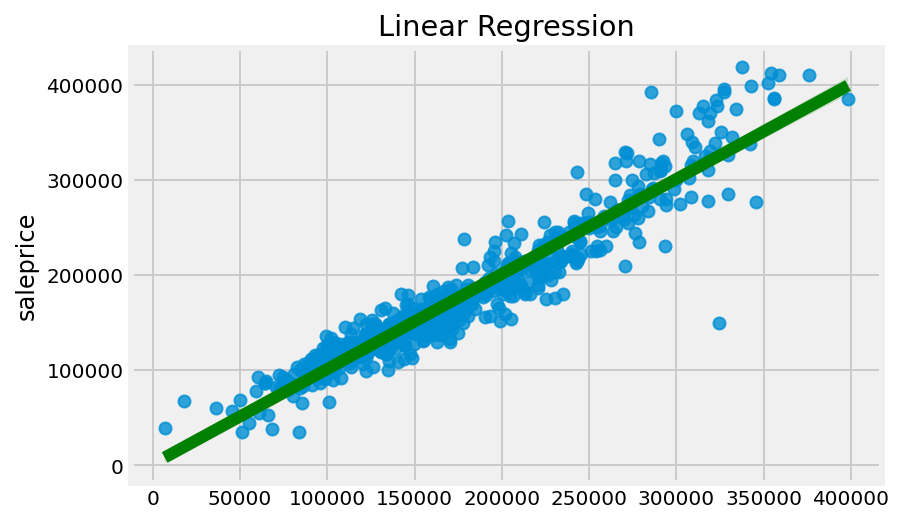

In [30]:
# Plot the linear regression scatterplot 
# Fit the prediction and y test dataset into Linear Regression
plt.title('Linear Regression')
sns.regplot(x=y_preds_lr, y=y_test, line_kws={'color':'green'});

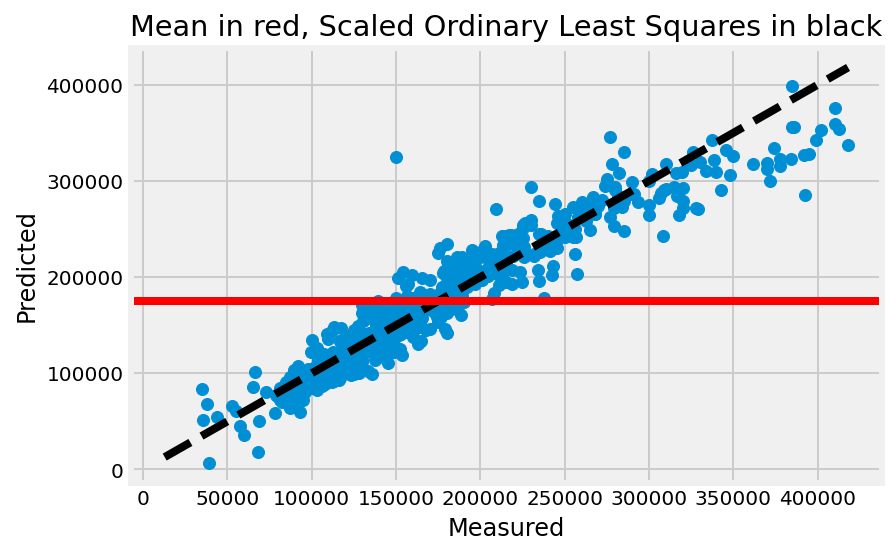

In [31]:
# Plot scatterplot with mean line
fig, ax = plt.subplots()
ax.scatter(y_test, y_preds_lr)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, Scaled Ordinary Least Squares in black")
plt.show()

In [32]:
# Find the RMSE score for this model
RMSE = metrics.mean_squared_error(y_true=y_test, y_pred=y_preds_lr )**.5
print(f'Mean Root Square Error in dollars: {round(RMSE,2)}.')

Mean Root Square Error in dollars: 22692.69.


## RidgeCV Regression

Ridge regression Ridge takes similar approach but it penalizes the model for the sum of squared value of the weights. Thus, the weights not only tend to have smaller absolute values, but also really tend to penalize the extremes of the weights, resulting in a group of weights that are more evenly distributed.  penalizes the model for the sum of squared value of the weights. Thus, the weights not only tend to have smaller absolute values, but also really tend to penalize the extremes of the weights, resulting in a group of weights that are more evenly distributed. 

Ridge performs best with logspace. Logspace incremental spacing generates 100 values between 0.1 to 10 then converts them to alphas between 10^-3 and 1 (that is, in logscale).

In [33]:
# Instantiate
ridge_cv = RidgeCV(alphas=np.logspace(0, 5, 200), scoring='r2', cv=10)

In [34]:
# Fit model using best ridge alpha
ridge_cv.fit(Xs, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.37006433e+0...
       2.64308149e+04, 2.80050389e+04, 2.96730241e+04, 3.14403547e+04,
       3.33129479e+04, 3.52970730e+04, 3.73993730e+04, 3.96268864e+04,
       4.19870708e+04, 4.44878283e+04, 4.71375313e+04, 4.99450512e+04,
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]),
        cv=10, scoring='r2')

In [35]:
# Find the optimal value of alpha
ridge_cv.alpha_

5.052631065335681

In [36]:
# Find model coefficient
ridge_cv.coef_

array([-6107.21721842,  6244.00210954,  2415.57837942,  1742.94856597,
       13138.07025314,  -791.76187564, -4612.19520267,  6249.33781012,
        1718.50437591, -1204.16196564, -1512.36164357, -1800.33667802,
       -1223.7305062 ,  2403.85718785,   -55.09714118,  4354.79063433,
        2052.94959632,  4494.11328377,  2444.15964886,  3832.16507301,
        1063.04581442,   483.73293304,  1198.06977893, 11319.12100417,
        1889.7028893 ,  1400.047073  ,  5431.33115175,  4167.67849635,
       17047.67703948, -8470.95061692, -6194.8936794 , -1178.84588575,
       17497.86339177])

In [37]:
print(f'RidgeCV Regression training R^2 score: {round(ridge_cv.score(Xs, y_train),4)}')
print(f'RidgeCV Regression test R^2 score: {round(ridge_cv.score(Xs_test, y_test),4)}')

RidgeCV Regression training R^2 score: 0.8944
RidgeCV Regression test R^2 score: 0.904


In [38]:
# Get predictions from our train X data
y_preds_ridgecv = ridge_cv.predict(Xs_test)

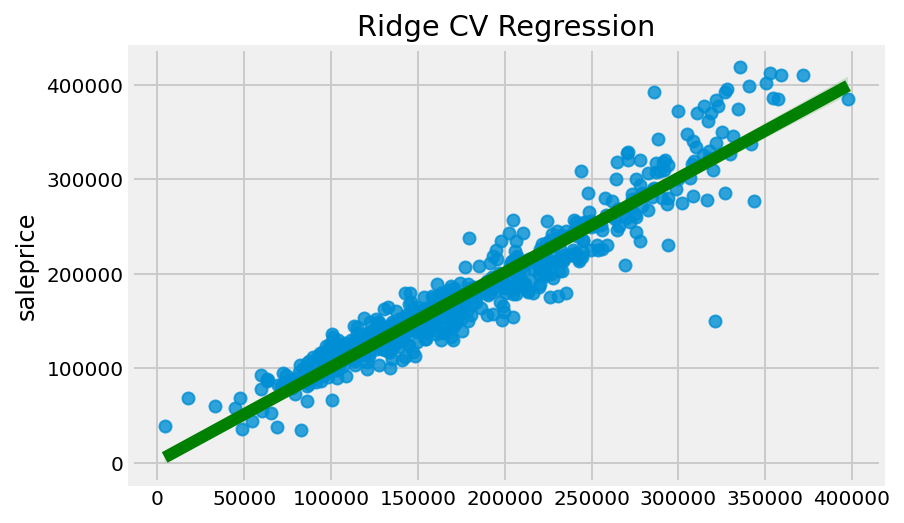

In [39]:
# Plot the linear regression scatterplot 
# Fit the Xs and y dataset into Linear Regression
plt.title('Ridge CV Regression')
sns.regplot(x=y_preds_ridgecv, y=y_test, line_kws={'color':'green'});

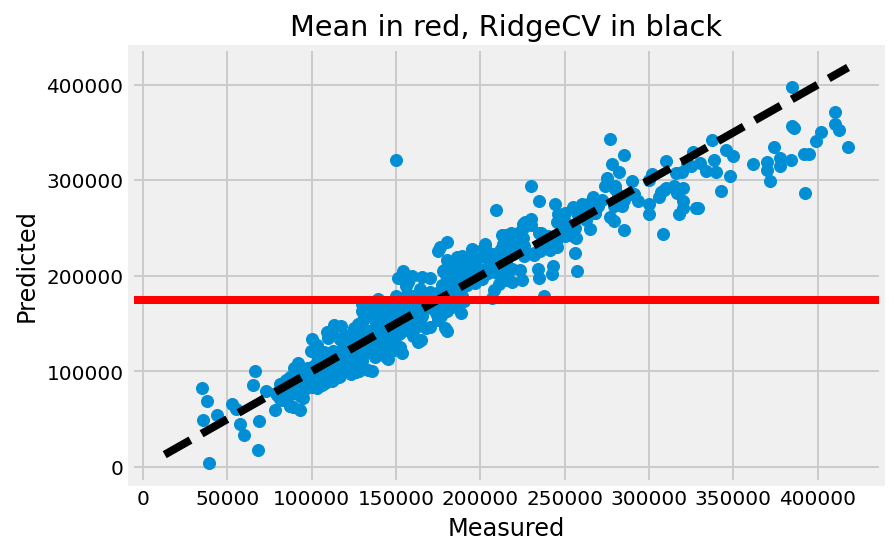

In [40]:
# Scatterplot for the model
fig, ax = plt.subplots()
ax.scatter(y_test, y_preds_ridgecv)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, RidgeCV in black")
plt.show()

In [41]:
RMSE = metrics.mean_squared_error(y_true=y_test, y_pred=y_preds_ridgecv )**.5
print(f'Mean Root Square Error in dollars: {round(RMSE,2)}.')

Mean Root Square Error in dollars: 22673.49.


In [42]:
coefficients = pd.DataFrame(ridge_cv.coef_,X.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
age,-6107.217218
neighborhood_quality,6244.002110
local_features,2415.578379
remodeled,1742.948566
overall_quality,13138.070253
single_story,-791.761876
double_story,-4612.195203
external_quality,6249.337810
external_features,1718.504376
duplex_building,-1204.161966


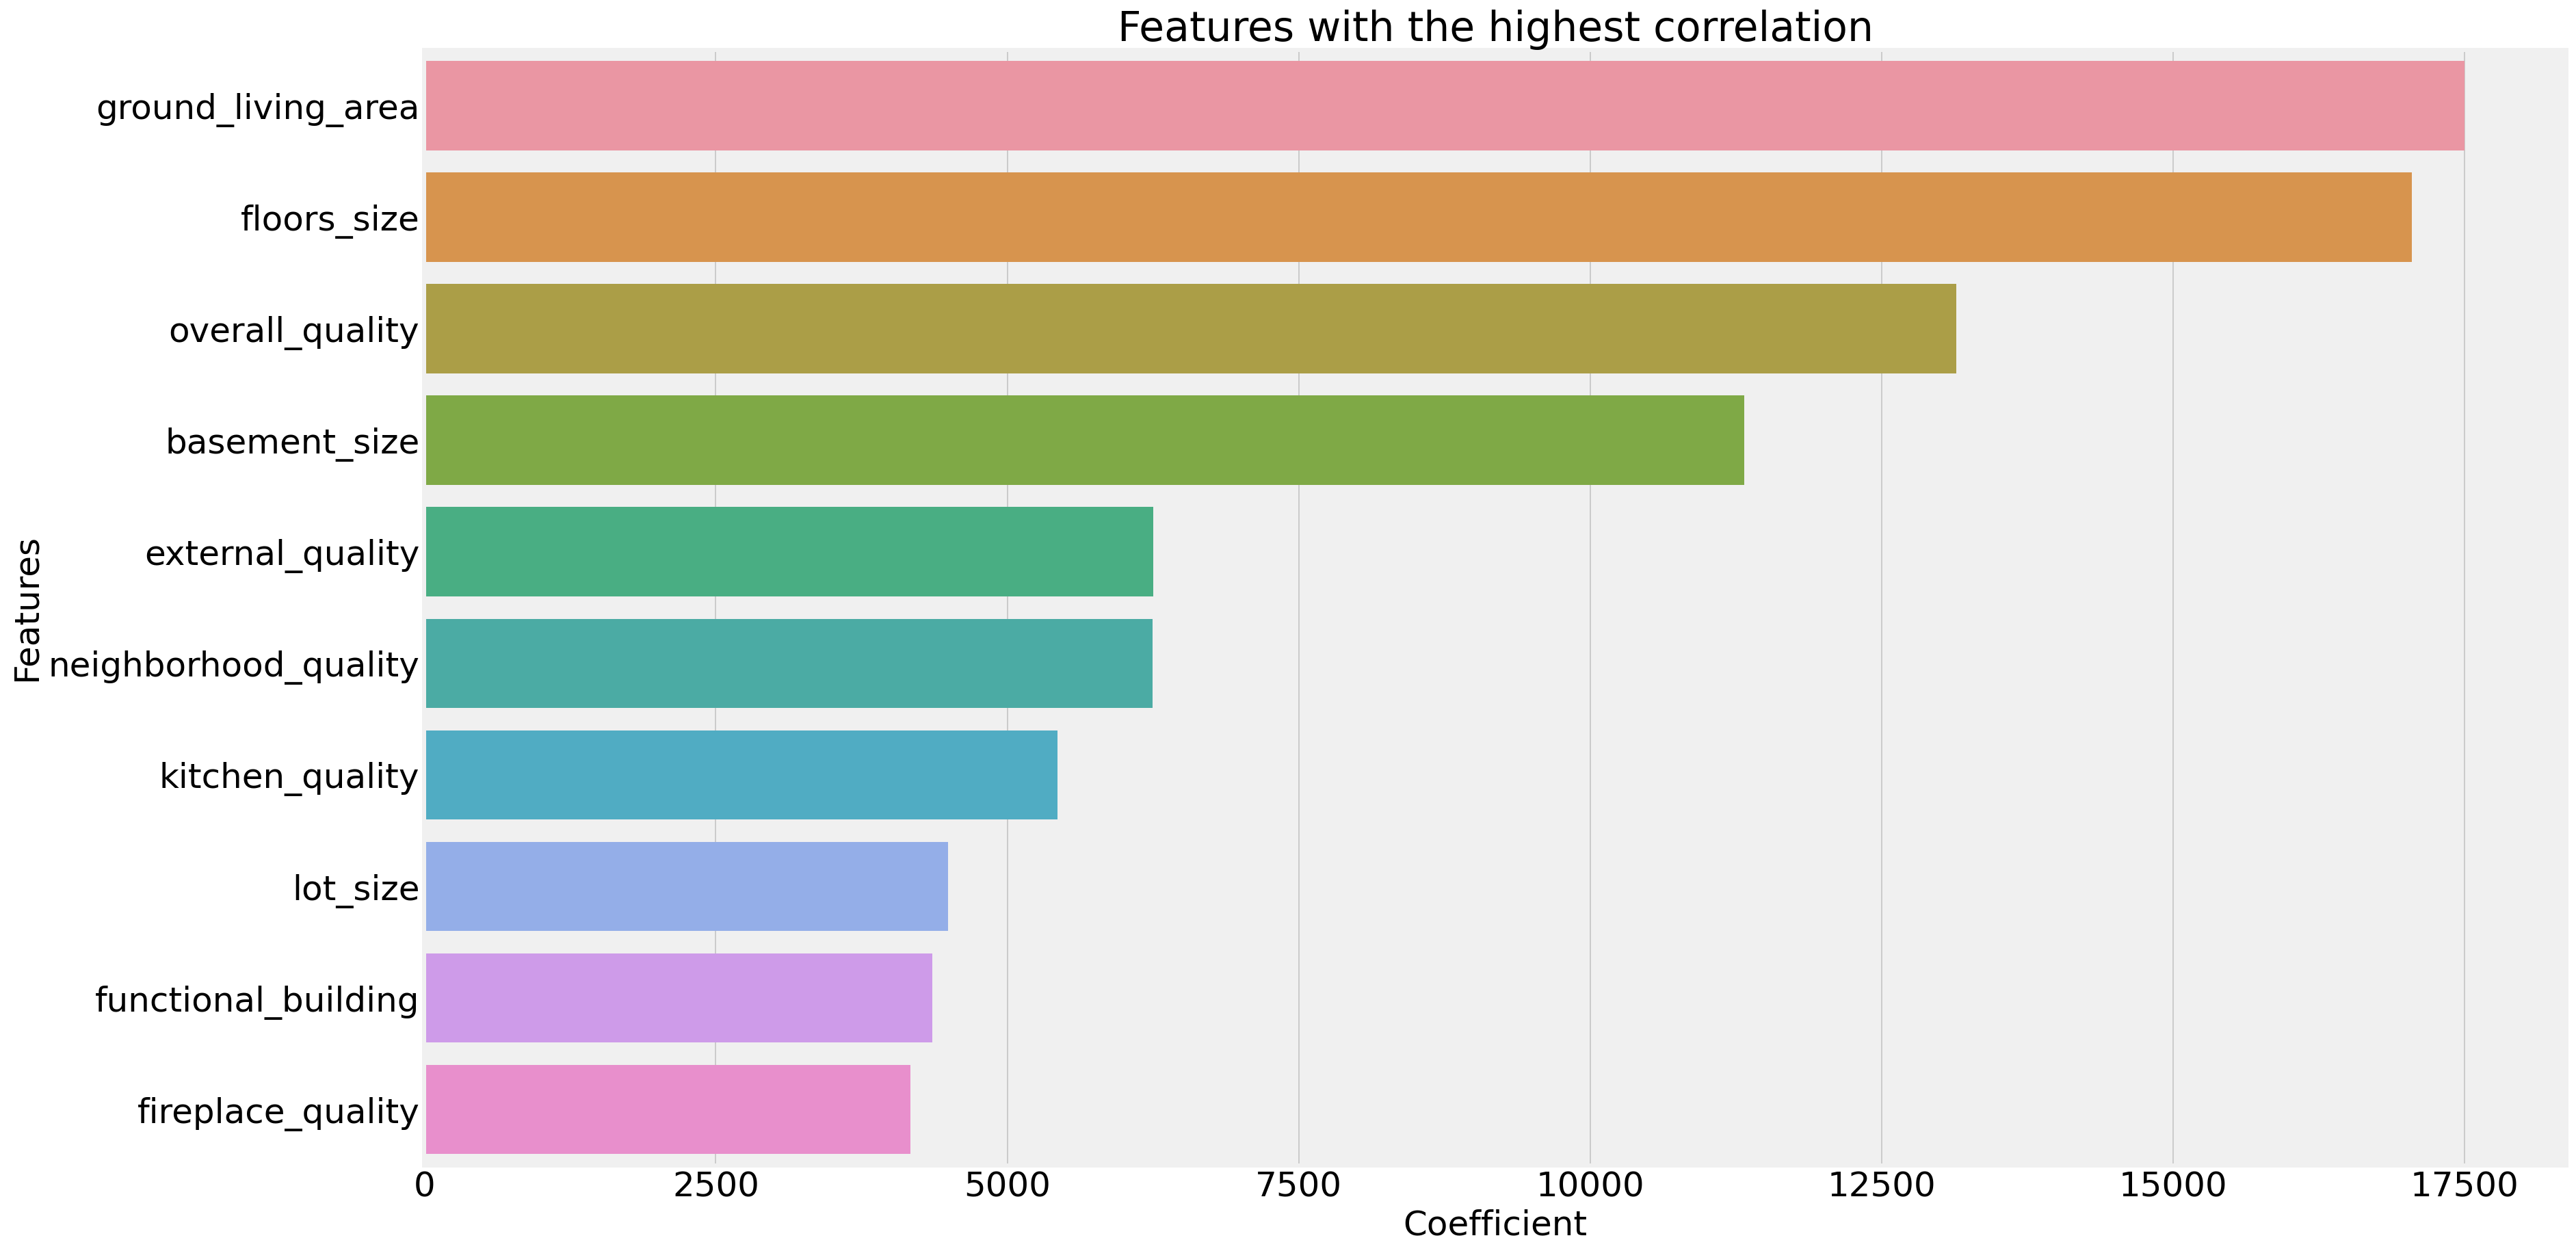

In [43]:
# Plotting on the top coefficient features
coefficient_sorted = coefficients.sort_values(by='Coefficient',ascending=False)
highest_df = coefficient_sorted.head(10)

highest_df.reset_index()

highest_df = highest_df.reset_index()

highest_df.rename(columns={'index': 'Features'}, inplace=True)

plt.figure(figsize=(25, 15))
sns.barplot(data=highest_df, x='Coefficient', y= 'Features')
plt.xticks (fontsize = 25)
plt.yticks (fontsize = 25)
plt.title('Features with the highest correlation',fontsize = 30)
plt.xlabel('Coefficient', fontsize = 25)
plt.ylabel('Features',fontsize = 25);

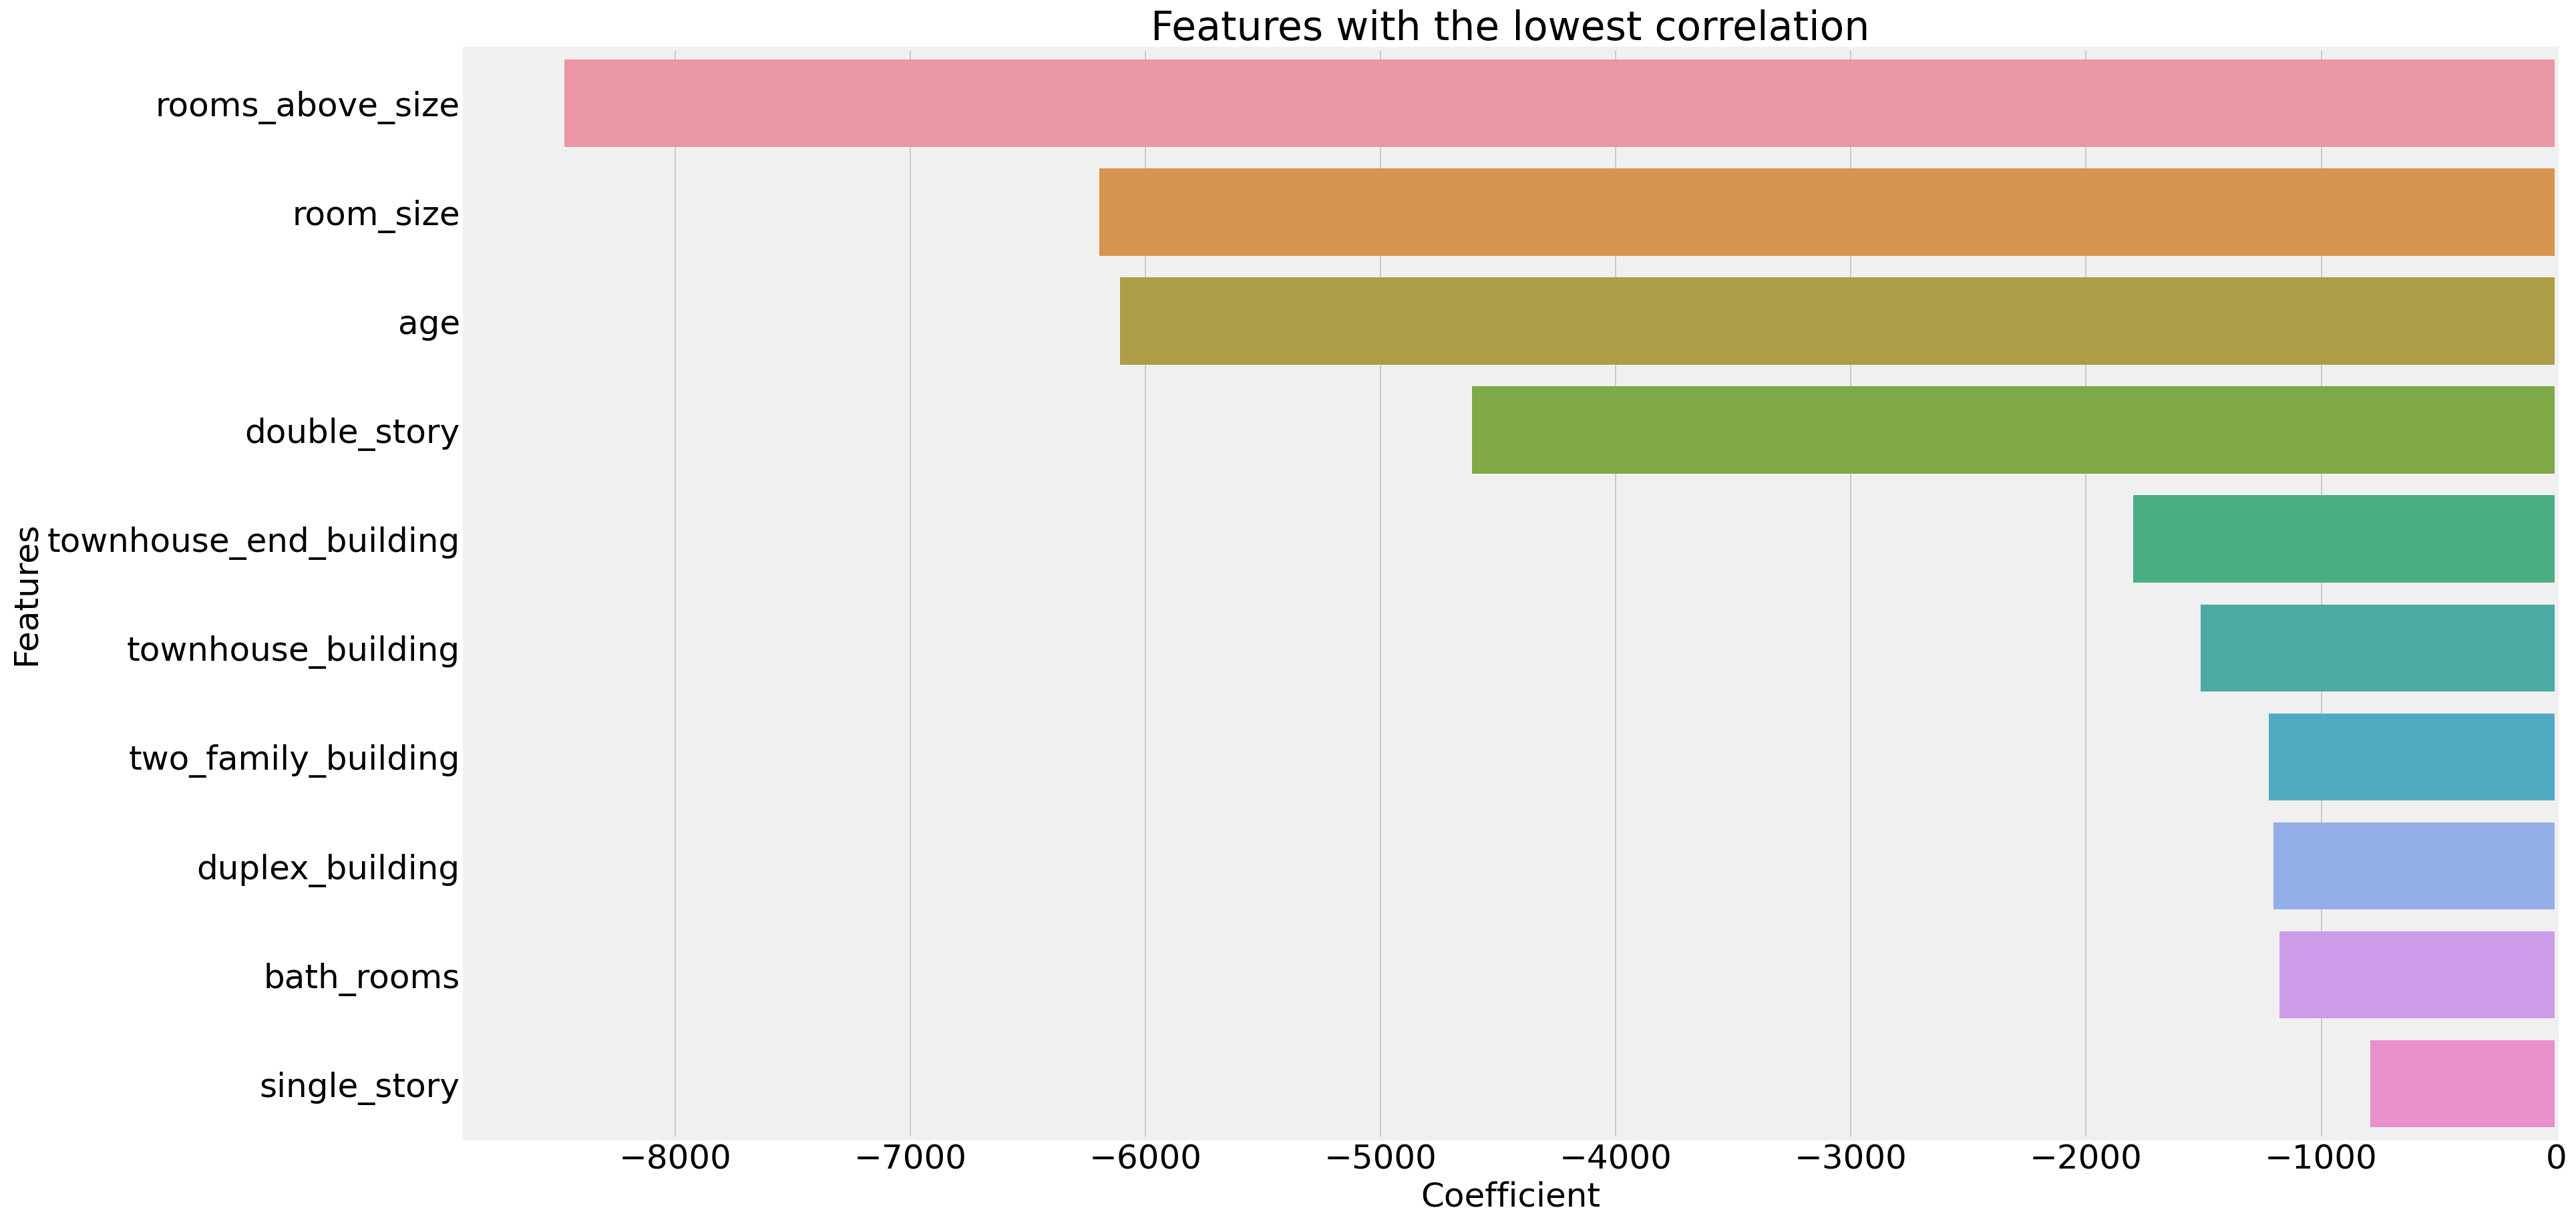

In [44]:
# Plotting on the bottom coefficient features
coefficient_sorted_low = coefficients.sort_values(by='Coefficient',ascending=True)
lowest_df = coefficient_sorted_low[0:10]

lowest_df.reset_index()

lowest_df = lowest_df.reset_index()

lowest_df.rename(columns={'index': 'Features'}, inplace=True)

plt.figure(figsize=(25, 15))
sns.barplot(data=lowest_df, x='Coefficient', y= 'Features')
plt.xticks (fontsize = 25)
plt.yticks (fontsize = 25)
plt.title('Features with the lowest correlation',fontsize = 30)
plt.xlabel('Coefficient', fontsize = 25)
plt.ylabel('Features',fontsize = 25);

## LassoCV Regression

Lasso is a modification of linear regression. This mode penalized for the sum of absolute values of the weights. Thus, the absolute values of weight will be (in general) reduced, and many will tend to be zeros which means it will drop features that it deem not useful to the modeling.

It also uses hyperparameter, alpha, the coefficient to penalize weights.

In [45]:
# Instantiate
# default n_alphas = 100, it is inserted just for reminder of this parameter 
lasso_cv = LassoCV(n_alphas = 100, cv = 10)

In [46]:
# Fit model using best ridge alpha
lasso_cv.fit(Xs, y_train)

LassoCV(cv=10)

In [47]:
# Find the best alpha parameter
lasso_cv.alpha_

52.82437926696488

In [48]:
# Find the coefficient
lasso_cv.coef_

array([-6066.03525276,  6229.54147336,  2375.29170777,  1663.61244027,
       13219.30617251,  -751.42630235, -4598.43691271,  6226.87563097,
        1701.05543645, -1238.0532459 , -1486.36924653, -1769.17808055,
       -1219.1904135 ,  2379.98790939,    -0.        ,  4326.5349705 ,
        2082.32211046,  4465.22288339,  2407.03253467,  3872.34012933,
         985.78263436,   414.40312274,  1137.71541304, 11311.69475334,
        1854.72449274,  1362.87045489,  5431.342665  ,  4144.9995387 ,
       17159.97419886, -7479.24654425, -5424.44125414, -1059.24555053,
       16126.22318305])

In [49]:
coefficients = pd.DataFrame(lasso_cv.coef_,X.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
age,-6066.035253
neighborhood_quality,6229.541473
local_features,2375.291708
remodeled,1663.612440
overall_quality,13219.306173
single_story,-751.426302
double_story,-4598.436913
external_quality,6226.875631
external_features,1701.055436
duplex_building,-1238.053246


In [50]:
print(f' LassoCV Regression training R^2 score: {round(lasso_cv.score(Xs, y_train),4)}')
print(f' LassoCV Regression test R^2 score: {round(lasso_cv.score(Xs_test, y_test),4)}')

 LassoCV Regression training R^2 score: 0.8943
 LassoCV Regression test R^2 score: 0.9039


In [51]:
y_preds_lassocv = lasso_cv.predict(Xs_test)

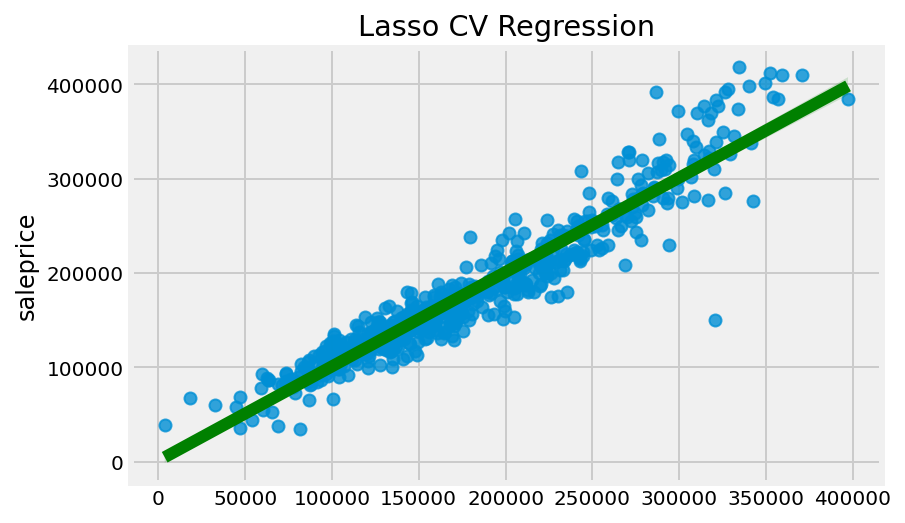

In [52]:
# Plot the linear regression scatterplot 
# Fit the Xs and y dataset into Linear Regression
plt.title('Lasso CV Regression')
sns.regplot(x=y_preds_lassocv, y=y_test, line_kws={'color':'green'});

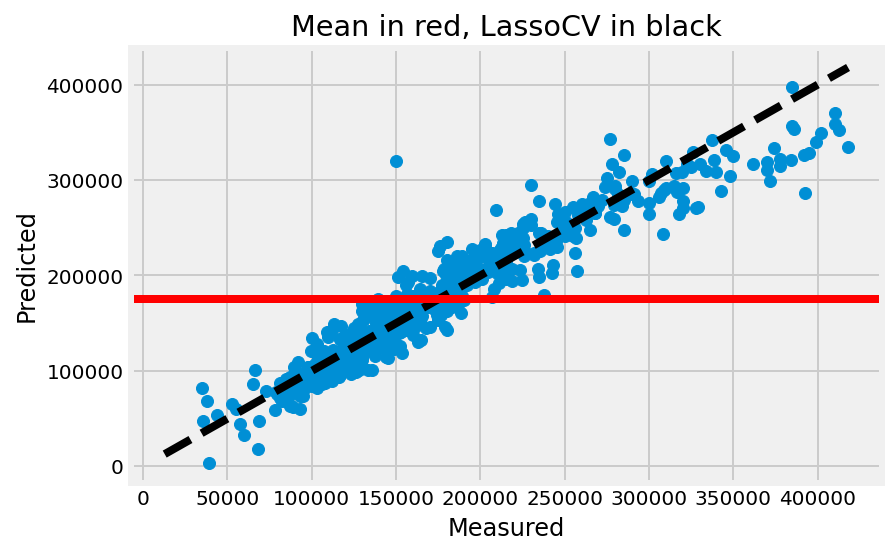

In [53]:
# Scatterplot for the model
fig, ax = plt.subplots()
ax.scatter(y_test, y_preds_lassocv)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, LassoCV in black")
plt.show()

In [54]:
# Find the RMSE score for the model
RMSE = metrics.mean_squared_error(y_true=y_test, y_pred=y_preds_lassocv )**.5
print(f'Mean Root Square Error in dollars: {round(RMSE,2)}.')

Mean Root Square Error in dollars: 22685.97.


## Pipeline and Gridsearch

Let's look at using pipeline saves time by executing scaling, model initiation and polynomial feature creation.

Gridsearch searches for the best values in a given list of parameters

## Ridge Regression

In [55]:
# Create pipeline for ridge model
pipe_ridge = Pipeline([
    ('ss', StandardScaler()),
    ('ridge', Ridge())
])

In [56]:
# Create parameters for gridsearch
ridge_params = {'ridge__alpha':np.logspace(-1, 3, 500),
               'ridge__max_iter':[10000]}

In [57]:
# Apply pipeline and gridsearch to GridSearchCV
pipe_ridge_gridsearch = GridSearchCV(
                                pipe_ridge, 
                                param_grid=ridge_params,
                            )

In [58]:
# Fit best result from grid search
# X_train is used since it will be standardscaled under pipeline
pipe_ridge_gridsearch.fit(X_train, y_train)
pipe_ridge_gridsearch.best_estimator_

Pipeline(steps=[('ss', StandardScaler()),
                ('ridge', Ridge(alpha=3.460016392185109, max_iter=10000))])

In [59]:
classifier_ridge_grid = pipe_ridge_gridsearch.best_estimator_.named_steps['ridge']

In [60]:
classifier_ridge_grid.coef_
# pipe_ridge_gridsearch.best_estimator_.steps[1][1].coef_

array([-6127.84576823,  6239.42995112,  2416.48804312,  1749.35493345,
       13199.64719878,  -778.66839894, -4622.71352971,  6245.14264281,
        1704.50726646, -1149.15956745, -1502.25959898, -1770.58990743,
       -1197.06169935,  2402.78719247,   -57.24833993,  4354.53331189,
        2033.08451465,  4510.48278143,  2442.73386381,  3814.06856927,
        1065.91840198,   485.36878576,  1200.52334449, 11332.03725976,
        1888.03375423,  1415.92070789,  5414.18727812,  4155.71595977,
       17246.49011643, -9547.88728026, -7015.42032151, -1205.13970051,
       18690.303279  ])

In [61]:
pipe_ridge_gridsearch.best_score_

0.8868642183583351

In [62]:
# X_test is used since X_train is used earlier without standardscaler
y_preds_ridge = pipe_ridge_gridsearch.predict(X_test)

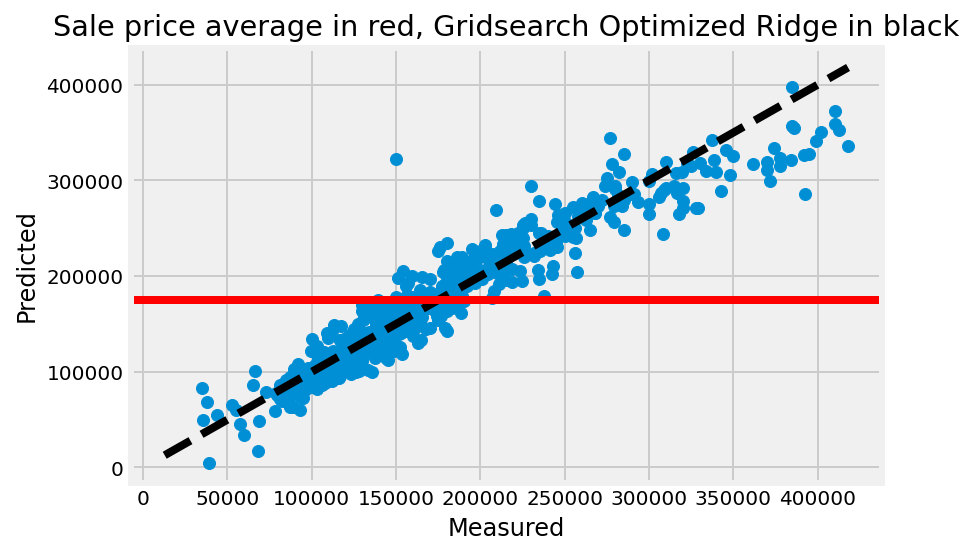

In [63]:
# scatterplot for the model
fig, ax = plt.subplots()
ax.scatter(y_test, y_preds_ridge)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Sale price average in red, Gridsearch Optimized Ridge in black")
plt.show()

In [64]:
print(f' Ridge Regression training R^2 score: {round(classifier_ridge_grid.score(Xs, y_train),4)}')
print(f' Ridge Regression test R^2 score: {round(classifier_ridge_grid.score(Xs_test, y_test),4)}')

 Ridge Regression training R^2 score: 0.8944
 Ridge Regression test R^2 score: 0.904


In [65]:
# Find the RMSE for the model
RMSE = metrics.mean_squared_error(y_true=y_test, y_pred=y_preds_ridge )**.5
print(f'Mean Root Square Error in dollars: {round(RMSE,2)}.')

Mean Root Square Error in dollars: 22676.54.


## Lasso Regression

In [66]:
# Create pipeline for ridge model
lasso_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lassocv', Lasso())
])

In [67]:
# Create parameters for gridsearch
lasso_params = {'lassocv__alpha':np.logspace(-1, 3, 1000),
               'lassocv__max_iter':[5000],
               'lassocv__warm_start':[True]}

In [68]:
# Apply pipeline and gridsearch to GridSearchCV
lasso_pipe_gridsearch = GridSearchCV(lasso_pipe, 
                               param_grid=lasso_params)

In [69]:
# Fit best result from grid search
# X_train (iso Xs) is used since it will be standardscaled under pipeline
lasso_pipe_gridsearch.fit(X_train, y_train)
lasso_pipe_gridsearch.best_estimator_

Pipeline(steps=[('ss', StandardScaler()),
                ('lassocv',
                 Lasso(alpha=25.9665597293487, max_iter=5000,
                       warm_start=True))])

In [70]:
classifier_lassocv_grid = lasso_pipe_gridsearch.best_estimator_.named_steps['lassocv']

In [71]:
classifier_lassocv_grid.coef_

array([ -6120.79424179,   6230.08814956,   2397.01707128,   1711.63580197,
        13285.29183903,   -751.14412633,  -4619.46433585,   6232.31595961,
         1684.25465049,  -1107.7253304 ,  -1481.34103338,  -1726.3081836 ,
        -1168.18363173,   2391.28603172,    -20.47441108,   4339.82967318,
         2027.69976828,   4512.14007362,   2424.33426706,   3817.8084538 ,
         1038.67043878,    454.31372736,   1176.70056398,  11330.882336  ,
         1872.89879187,   1412.6181474 ,   5401.81571624,   4136.91000417,
        17042.39296125, -10142.61952671,  -7454.79460601,  -1161.39365122,
        19652.95176886])

In [72]:
print(f' LassoCV Regression training R^2 score: {round(classifier_lassocv_grid.score(Xs, y_train),4)}')
print(f' LassoCV Regression test R^2 score: {round(classifier_lassocv_grid.score(Xs_test, y_test),4)}')

 LassoCV Regression training R^2 score: 0.8944
 LassoCV Regression test R^2 score: 0.904


In [73]:
print(f'LassoCV R^2 Score: {round(lasso_pipe_gridsearch.best_score_,4)}')

LassoCV R^2 Score: 0.8868


In [74]:
# X_test (iso Xs_test) is used since X_train is used earlier without standardscaler
y_preds_lassocv = lasso_pipe_gridsearch.predict(X_test)

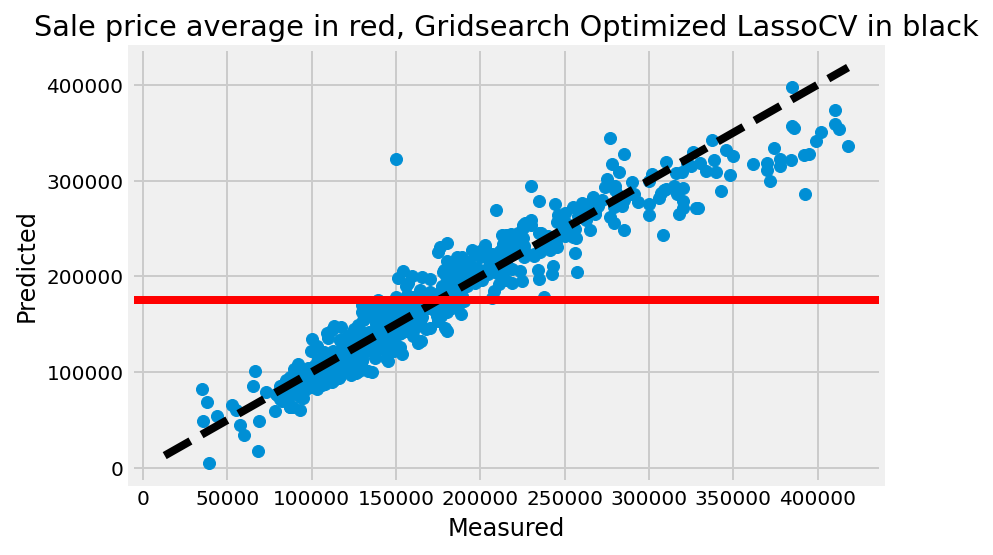

In [75]:
# Scatterplot for the model
fig, ax = plt.subplots()
ax.scatter(y_test, y_preds_lassocv)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Sale price average in red, Gridsearch Optimized LassoCV in black")
plt.show()

In [76]:
y_train.mean()

174916.32196162047

In [77]:
# Find the RMSE score for the model
RMSE = metrics.mean_squared_error(y_true=y_test, y_pred=y_preds_lassocv )**.5
print(f'Mean Root Square Error in dollars: {round(RMSE,2)}.')

Mean Root Square Error in dollars: 22682.82.


In [78]:
coefficients = pd.DataFrame(classifier_lassocv_grid.coef_,X.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
age,-6120.794242
neighborhood_quality,6230.088150
local_features,2397.017071
remodeled,1711.635802
overall_quality,13285.291839
single_story,-751.144126
double_story,-4619.464336
external_quality,6232.315960
external_features,1684.254650
duplex_building,-1107.725330


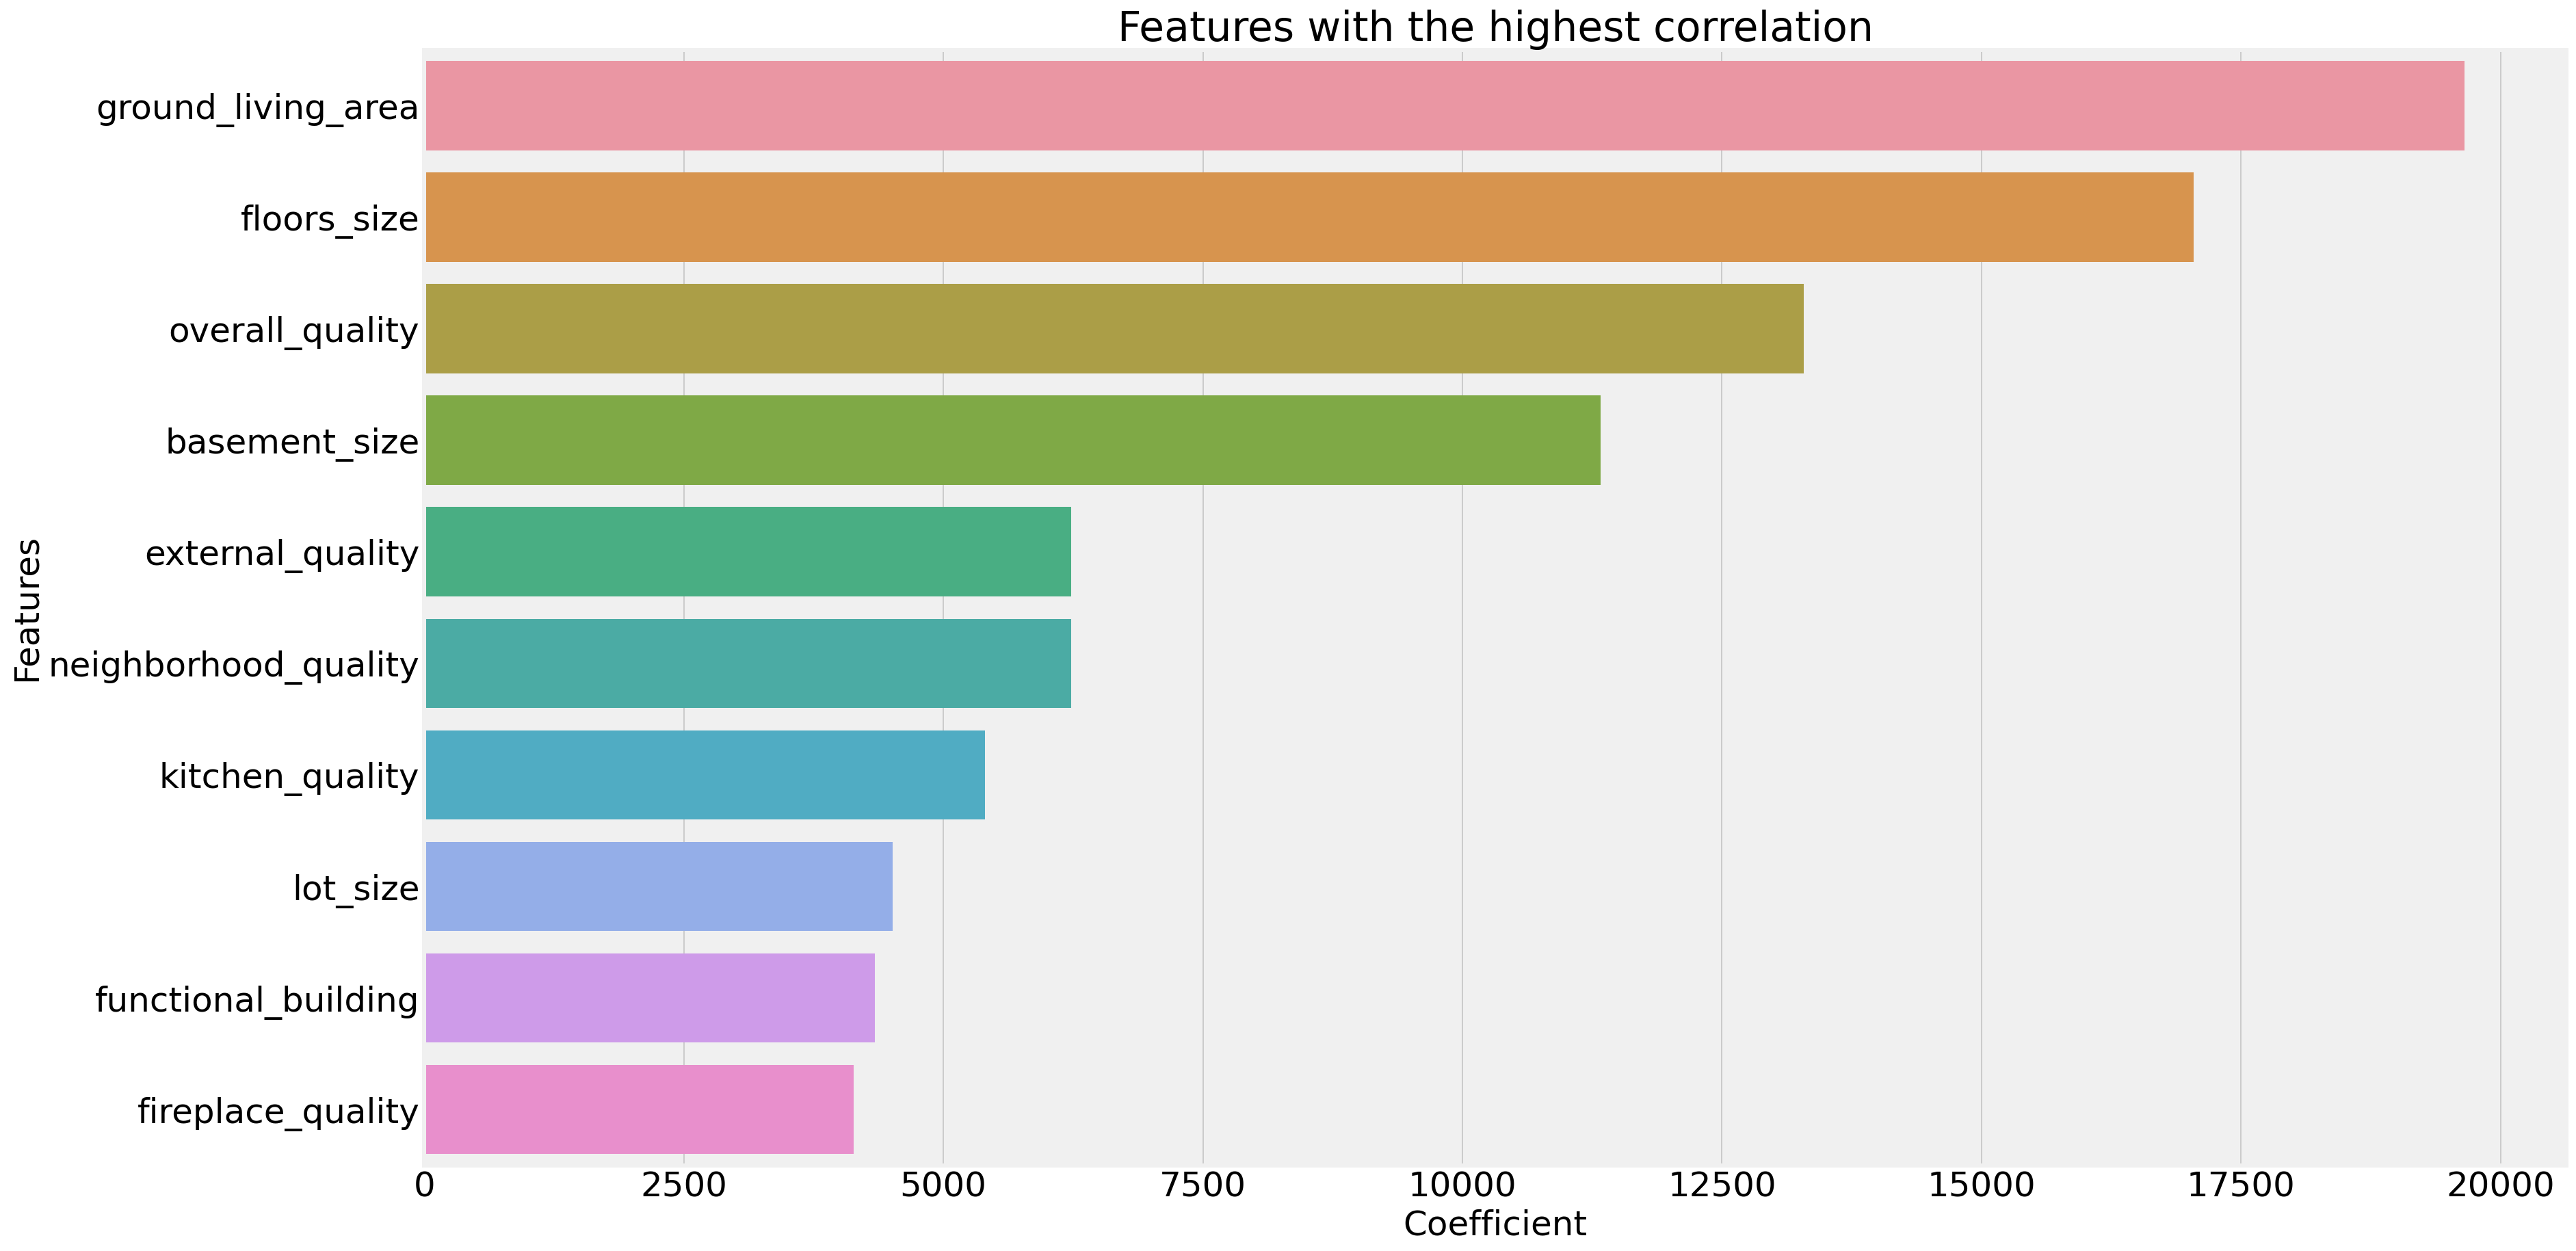

In [79]:
# Find the top coefficient features
coefficient_sorted = coefficients.sort_values(by='Coefficient',ascending=False)
highest_df = coefficient_sorted.head(10)

highest_df.reset_index()

highest_df = highest_df.reset_index()

highest_df.rename(columns={'index': 'Features'}, inplace=True)

plt.figure(figsize=(25, 15))
sns.barplot(data=highest_df, x='Coefficient', y= 'Features')
plt.xticks (fontsize = 25)
plt.yticks (fontsize = 25)
plt.title('Features with the highest correlation',fontsize = 30)
plt.xlabel('Coefficient', fontsize = 25)
plt.ylabel('Features',fontsize = 25);

In [80]:
highest_df

,Features,Coefficient
0,ground_living_area,19652.951769
1,floors_size,17042.392961
2,overall_quality,13285.291839
3,basement_size,11330.882336
4,external_quality,6232.315960
5,neighborhood_quality,6230.088150
6,kitchen_quality,5401.815716
7,lot_size,4512.140074
8,functional_building,4339.829673
9,fireplace_quality,4136.910004


In [81]:
coefficient_sorted

,Coefficient
ground_living_area,19652.951769
floors_size,17042.392961
overall_quality,13285.291839
basement_size,11330.882336
external_quality,6232.315960
neighborhood_quality,6230.088150
kitchen_quality,5401.815716
lot_size,4512.140074
functional_building,4339.829673
fireplace_quality,4136.910004


## Evaluate LassoCV model

Look at coefficients with LassoCV gridsearch

In [82]:
lasso_ss = StandardScaler()
lasso_Xs = lasso_ss.fit_transform(X_train)
lasso_Xs_test = lasso_ss.fit_transform(X_test)

In [83]:
lasso_coef_eval = Lasso(alpha = 25.9665597293487, max_iter=5000)

In [84]:
print(lasso_Xs.shape)
print(y_train.shape)

(1407, 33)
(1407,)


In [85]:
lasso_coef_eval.fit(lasso_Xs, y_train)
print(f'Lasso R^2 Cross Validated Score: {round(cross_val_score(lasso_coef_eval, lasso_Xs, y_train).mean(),4)}') 

Lasso R^2 Cross Validated Score: 0.8868


In [86]:
lasso_coef_eval.intercept_

174916.32196162047

In [87]:
project_model = pd.DataFrame(list(zip(X_train.columns, lasso_coef_eval.coef_)))
project_model

,0,1
0,age,-6120.794242
1,neighborhood_quality,6230.088150
2,local_features,2397.017071
3,remodeled,1711.635802
4,overall_quality,13285.291839
5,single_story,-751.144126
6,double_story,-4619.464336
7,external_quality,6232.315960
8,external_features,1684.254650
9,duplex_building,-1107.725330


## Using LassoCV Regression with polynomial features

In [200]:
# Create pipeline, parameters and gridsearch for lasso model
lasso_poly_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree = 2)), 
    ('ss', StandardScaler()),
    ('lassocv', Lasso())
])

lasso_poly_params = {'lassocv__alpha':np.logspace(1, 2.5, 100),
               'lassocv__max_iter':[10000],
                 'lassocv__tol':[.005]}

pipe_gridsearchlcv = GridSearchCV(lasso_poly_pipe, 
                                param_grid=lasso_poly_params,)

In [201]:
# Fit best result from grid search
pipe_gridsearchlcv.fit(Xs, y_train)
pipe_gridsearchlcv.best_estimator_

Pipeline(steps=[('poly', PolynomialFeatures()), ('ss', StandardScaler()),
                ('lassocv',
                 Lasso(alpha=316.22776601683796, max_iter=10000, tol=0.005))])

In [202]:
classifier_lassocvpoly_grid = pipe_gridsearchlcv.best_estimator_.named_steps['lassocv']

In [203]:
classifier_lassocvpoly_grid.coef_

array([ 0.00000000e+00, -6.30140904e+03,  6.18361649e+03,  8.04252326e+02,
        2.02970813e+02,  1.21156582e+04,  0.00000000e+00, -7.72751373e+00,
        2.36807774e+03,  1.18533068e+03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.40529234e+02,  2.73960379e+01,
        3.59648494e+03,  1.74352503e+03,  7.10629652e+03,  2.35320275e+03,
        4.39241815e+02,  3.91436968e+03,  5.83305144e+02,  1.61632770e+03,
        8.30081874e+03,  7.27772295e+02,  1.62885836e+03,  4.16472314e+03,
        3.34895492e+03,  2.11339133e+04,  0.00000000e+00,  0.00000000e+00,
        2.06361803e+03,  7.80645670e+00, -0.00000000e+00,  0.00000000e+00,
        4.08229066e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.01171781e+02,  1.04202519e+02,  7.11440338e+01,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  7.57254660e+01,  0.00000000e+00,  4.43646522e+02,
        0.00000000e+00, -

In [204]:
print(f'LassoCV With Polynomial Features R^2 Score: {round(pipe_gridsearchlcv.best_score_,4)}')

LassoCV With Polynomial Features R^2 Score: 0.9035


In [205]:
print(f' LassoCV Polynomial Regression training R^2 score: {round(pipe_gridsearchlcv.score(Xs, y_train),4)}')
print(f' LassoCV Polynomial Regression test R^2 score: {round(pipe_gridsearchlcv.score(Xs_test, y_test),4)}')

 LassoCV Polynomial Regression training R^2 score: 0.9365
 LassoCV Polynomial Regression test R^2 score: 0.9234


In [94]:
# X_test (iso Xs_test) is used since X_train is used earlier without standardscaler
y_preds_lassopoly = pipe_gridsearchlcv.predict(Xs_test)

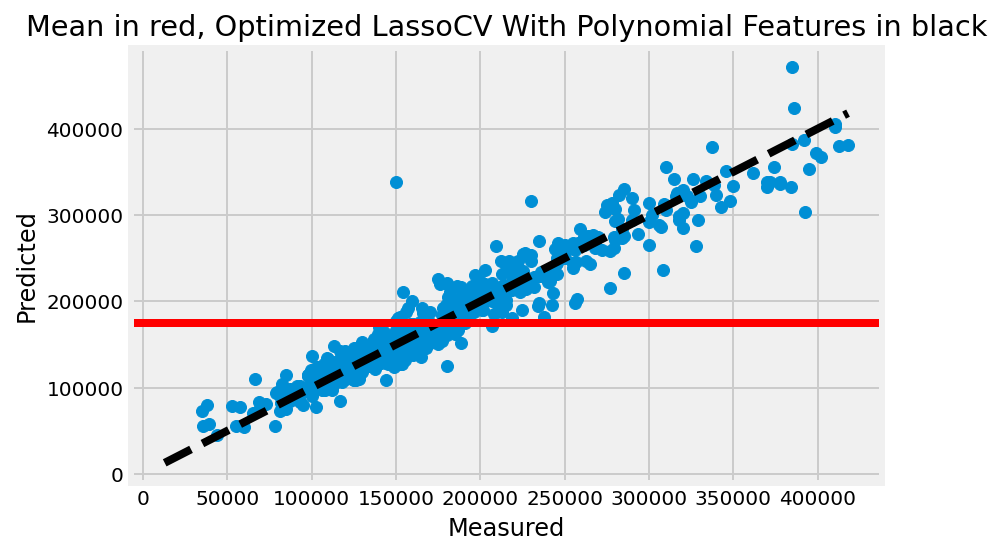

In [95]:
# Find scatterplot for the model
fig, ax = plt.subplots()
ax.scatter(y_test, y_preds_lassopoly)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, Optimized LassoCV With Polynomial Features in black")
plt.show()

In [96]:
RMSE = metrics.mean_squared_error(y_true=y_test, y_pred=y_preds_lassopoly )**.5
print(f'Mean Root Square Error in dollars: {round(RMSE,2)}.')


Mean Root Square Error in dollars: 20253.0.


In [97]:
X.columns

Index(['age', 'neighborhood_quality', 'local_features', 'remodeled',
       'overall_quality', 'single_story', 'double_story', 'external_quality',
       'external_features', 'duplex_building', 'townhouse_building',
       'townhouse_end_building', 'two_family_building', 'roof_quality',
       'residential', 'functional_building', 'lot_frontage', 'lot_size',
       'outside_space', 'garage_area', 'garage_cars', 'paved_driveway',
       'basement_quality', 'basement_size', 'basement_ceiling',
       'heating_quality', 'kitchen_quality', 'fireplace_quality',
       'floors_size', 'rooms_above_size', 'room_size', 'bath_rooms',
       'ground_living_area'],
      dtype='object')

In [98]:
coefficients = pd.DataFrame({'Features' : X.columns, 'Coefficient':classifier_lassocvpoly_grid.coef_[0:33]})
coefficients

,Features,Coefficient
0,age,0.000000
1,neighborhood_quality,-6301.409035
2,local_features,6183.616485
3,remodeled,804.252326
4,overall_quality,202.970813
5,single_story,12115.658154
6,double_story,0.000000
7,external_quality,-7.727514
8,external_features,2368.077740
9,duplex_building,1185.330681


In [99]:
coefficients1 = classifier_lassocvpoly_grid.coef_[0:33]
coefficients2 = abs(coefficients1)

coefficients3 = pd.DataFrame({'Features' : X.columns, 'Coefficient':coefficients2})
coefficients3

,Features,Coefficient
0,age,0.000000
1,neighborhood_quality,6301.409035
2,local_features,6183.616485
3,remodeled,804.252326
4,overall_quality,202.970813
5,single_story,12115.658154
6,double_story,0.000000
7,external_quality,7.727514
8,external_features,2368.077740
9,duplex_building,1185.330681


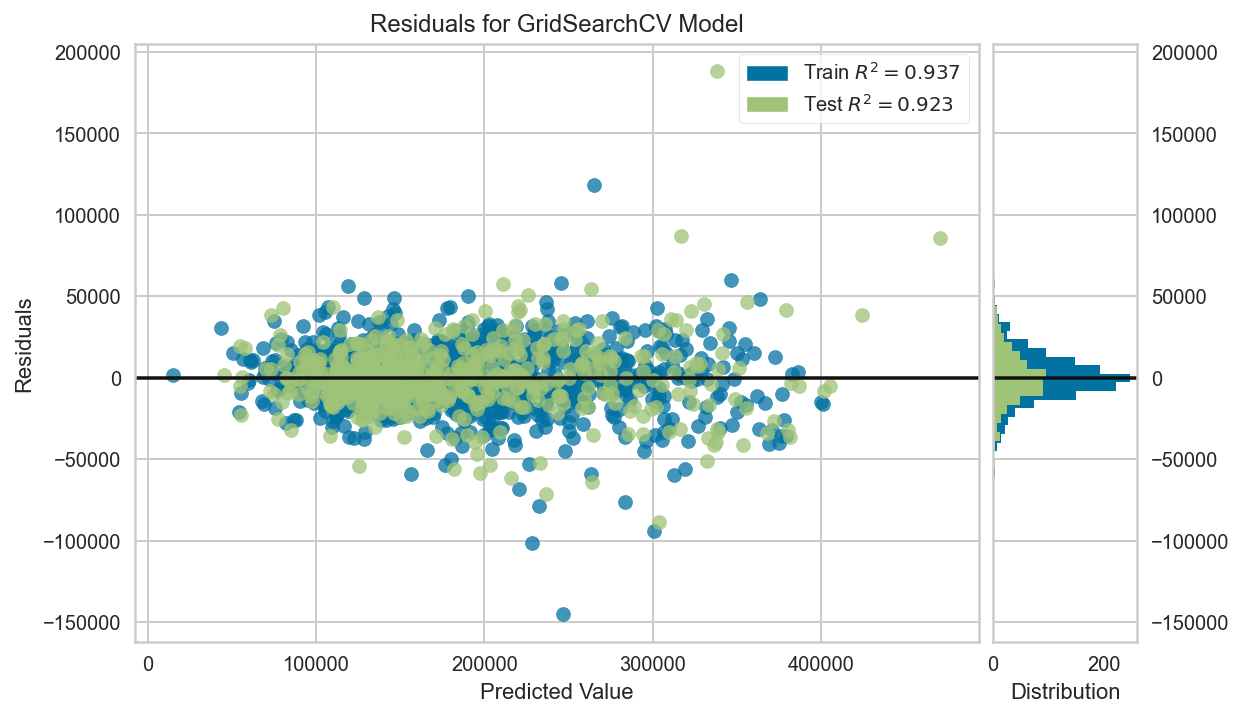

In [100]:
# To display the residuals of the R2 scores for train and test 

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(pipe_gridsearchlcv)

# Fit training data
visualizer.fit(Xs, y_train)

# Generates predicted target values on test data
visualizer.score(Xs_test, y_test)

# Show plot and save it at given path
visualizer.show();

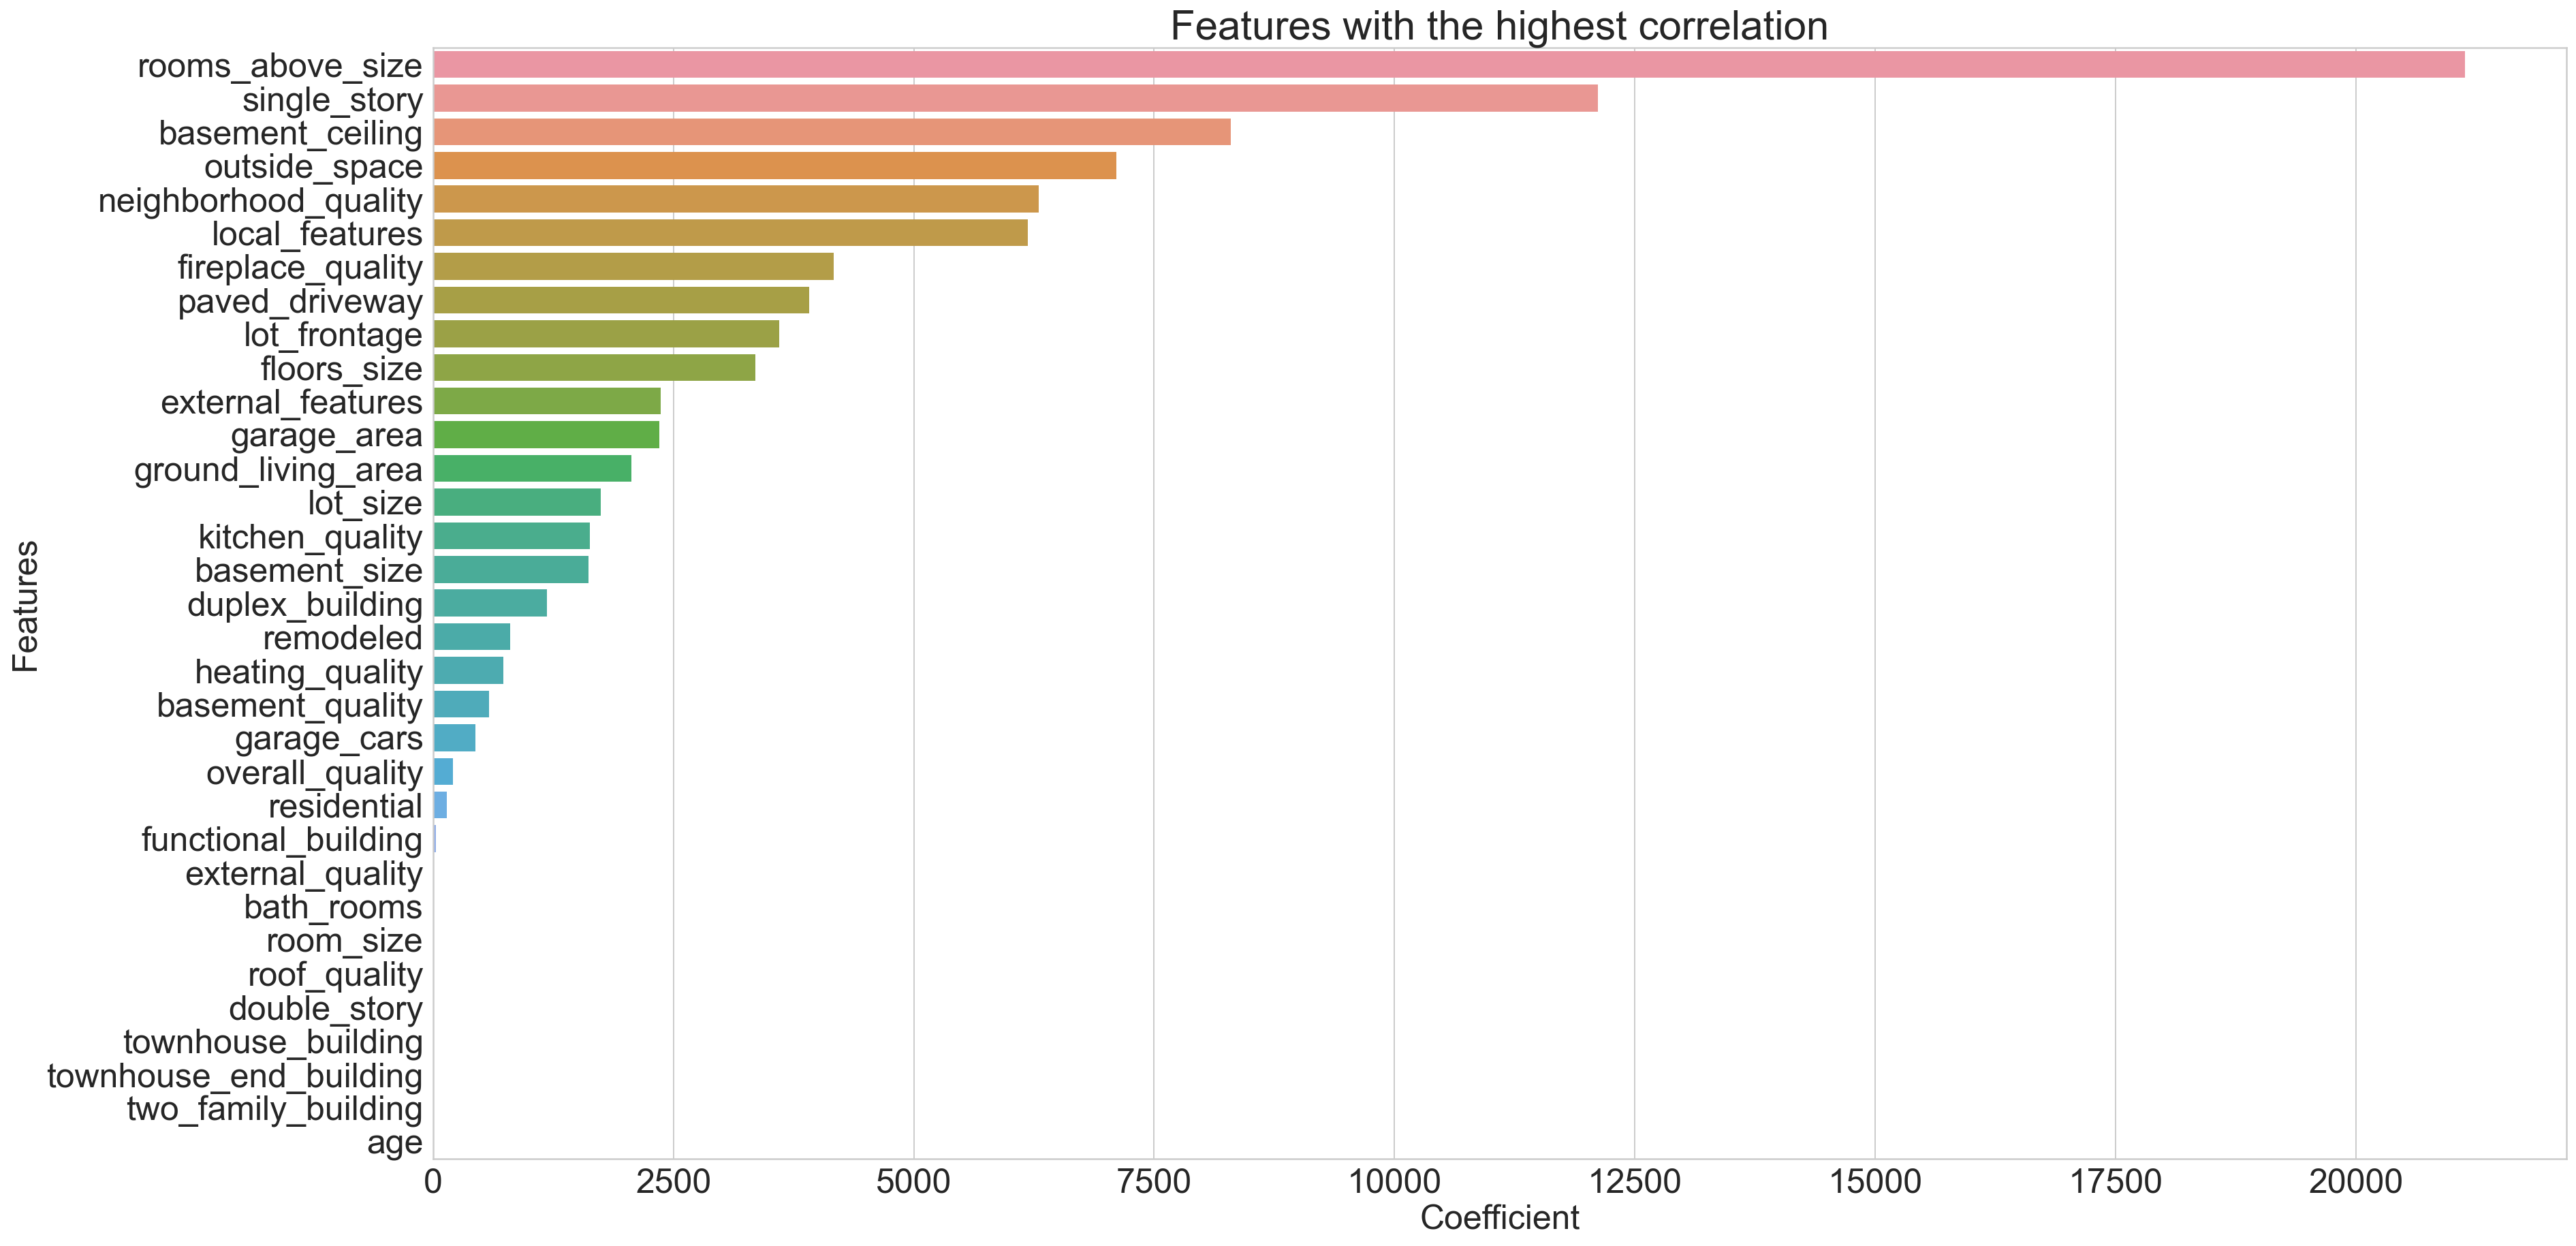

In [101]:
# Display the top 10 features of LassoCV with polynomial features

coefficient_sorted = coefficients3.sort_values(by='Coefficient',ascending=False)
highest_df = coefficient_sorted.head(33)

highest_df.reset_index()

highest_df = highest_df.reset_index()
highest_df.drop(columns='index')
# highest_df.rename(columns={'index': 'Features'}, inplace=True)

plt.figure(figsize=(25, 15))
plt.xticks (fontsize = 25)
plt.yticks (fontsize = 25)
plt.title('Features with the highest correlation',fontsize = 30)
plt.xlabel('Coefficient', fontsize = 25)
plt.ylabel('Features',fontsize = 25);
sns.barplot(data=highest_df, x='Coefficient', y='Features');


In [102]:
highest_df

,index,Features,Coefficient
0,29,rooms_above_size,21133.913336
1,5,single_story,12115.658154
2,24,basement_ceiling,8300.818738
3,18,outside_space,7106.296516
4,1,neighborhood_quality,6301.409035
5,2,local_features,6183.616485
6,27,fireplace_quality,4164.723142
7,21,paved_driveway,3914.369683
8,16,lot_frontage,3596.484944
9,28,floors_size,3348.954925


## Elastic Net Regression

#ElasticNet is a hybrid of Lasso and Ridge, where both the absolute value penalization and squared penalization are included, being regulated with another coefficient l1_ratio:

In [103]:
# Create pipeline for elastic net model
enet_pipeline = Pipeline([
            #('poly', PolynomialFeatures(degree=2)),
            ('ss', StandardScaler()),
            ('elasticnet', ElasticNet())
                        ])

In [104]:
# Find enet parameters
enet_parameters = {'elasticnet__alpha': np.logspace(-1, 4, 500),
                      #'elasticnet__normalize': [True, False],
                      'elasticnet__selection': ['cyclic', 'random'],
                        'elasticnet__max_iter': [10000],
                        'elasticnet__warm_start': [True]
                        #'elasticnet__tol': [.1]
                       }

In [105]:
# Create gridsearch 
elastic_net_model = GridSearchCV(
                enet_pipeline, 
           param_grid= enet_parameters)
elastic_net_model.fit(Xs, y_train)
elastic_net_model.best_estimator_

Pipeline(steps=[('ss', StandardScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.1, max_iter=10000, warm_start=True))])

In [106]:
classifier_elasticnet_grid = elastic_net_model.best_estimator_.named_steps['elasticnet']

In [107]:
print(f'ElasticNet Model R^2 Score: {round(elastic_net_model.best_score_,4)}')

ElasticNet Model R^2 Score: 0.8858


In [108]:
print(f' ElasticNet Regression training R^2 score: {round(elastic_net_model.score(Xs, y_train),4)}')
print(f' ElasticNet Regression test R^2 score: {round(elastic_net_model.score(Xs_test, y_test),4)}')

 ElasticNet Regression training R^2 score: 0.8925
 ElasticNet Regression test R^2 score: 0.9034


In [109]:
# Fit best result from grid search
# X_train (iso Xs) is used since it will be standardscaled under pipeline
y_preds_enet = elastic_net_model.predict(Xs_test)

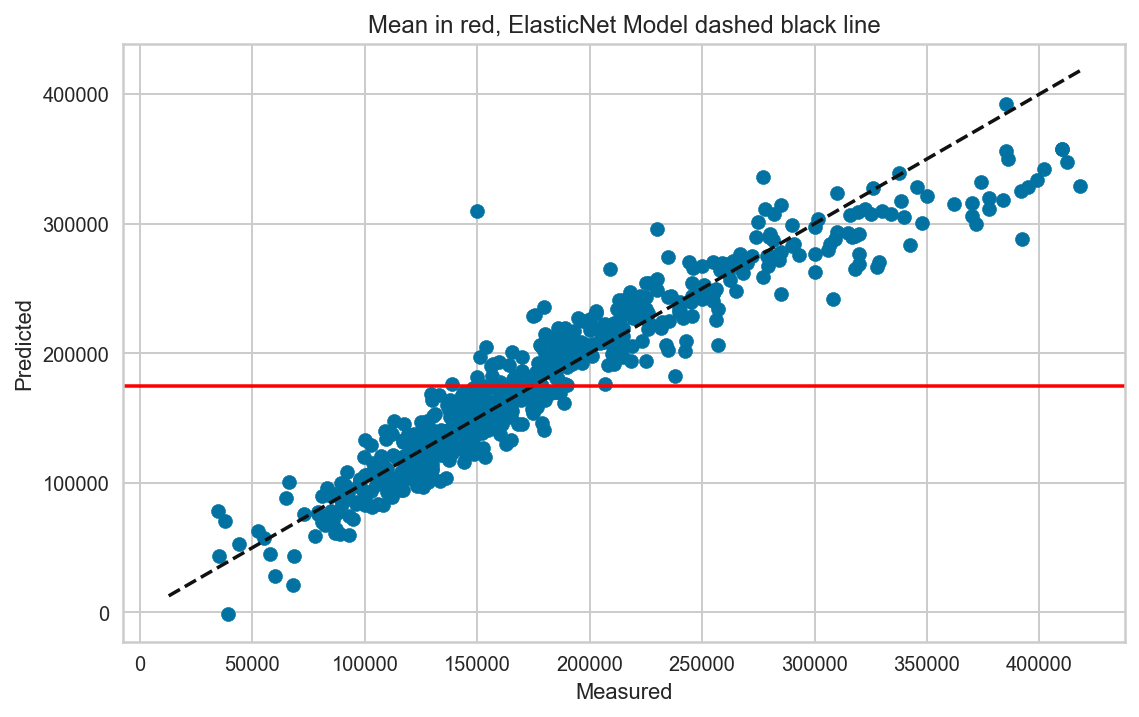

In [110]:
# Scatterplot for the model
fig, ax = plt.subplots()
ax.scatter(y_test, y_preds_enet)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, ElasticNet Model dashed black line")
plt.show()

In [111]:
# Find RMSE score for the model
RMSE = metrics.mean_squared_error(y_true=y_test, y_pred=y_preds_enet )**.5
print(f'Mean Root Square Error in dollars: {round(RMSE,2)}.')

Mean Root Square Error in dollars: 22752.07.


### Compare Ridge and Lasso residuals

In [112]:
# Fitting dataset for ridge and lasso
ridge_cv.fit(Xs, y_train)
lasso_cv.fit(Xs, y_train)

LassoCV(cv=10)

In [113]:
# Finding the residuals
ridge_residuals = y_train - ridge_cv.predict(Xs)
lasso_residuals = y_train - lasso_cv.predict(Xs)

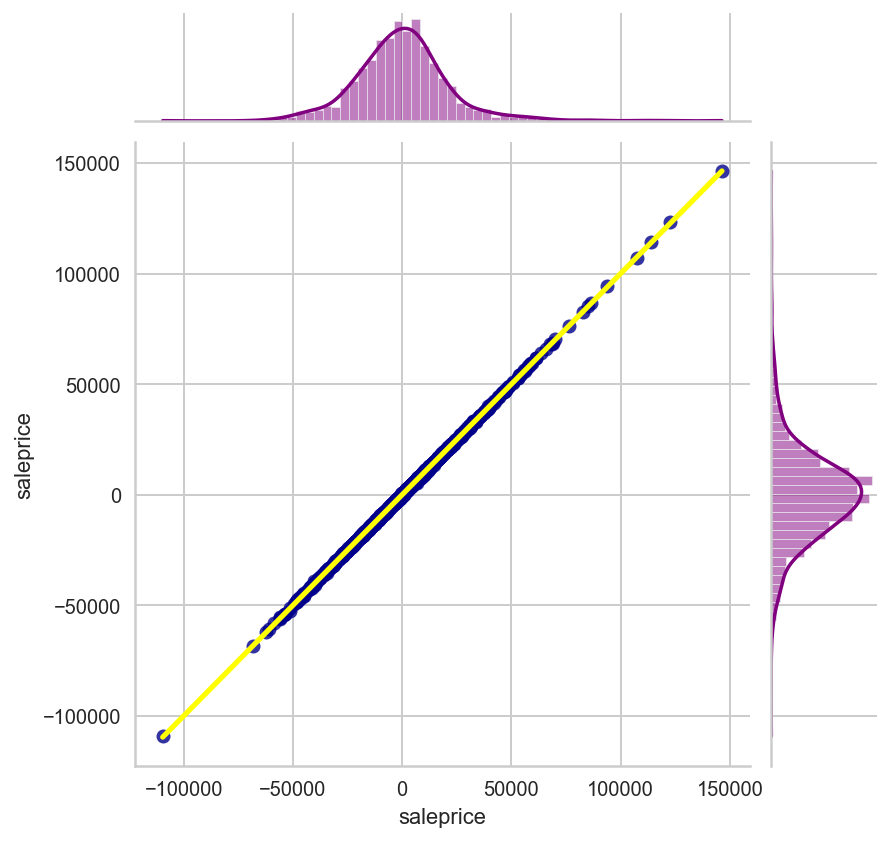

In [114]:
# Join plot of Ridge and Lasso
sns.jointplot(x=ridge_residuals, y=lasso_residuals, kind='reg', color='darkblue', line_kws={'color':'yellow'},
              marginal_kws={'color':'purple'});

## Conclusion and Recommendation

With all the modeling, based on the R2score, the train and test performed very close to each other. This indicates that the model are not too overfitting or underfitting. The R2 score are consistent for most of the models except LassoCV with polynomial features which brings out the best performance. 

LassoCV with polynomial features regression by far has the best test score at 92.34%. With 33 features now, it is now more ideal and easy to explain to relevant stakeholders. Again, the model does not look to be overfitted as they perform better on the test score.

LassoCV With Polynomial Features 
- R^2 test Score: 0.9234
- Mean Root Square Error in dollars: 20,253.00

| Modeling                         | R^2 Score train | R^2 Score test | RMSE Score  |
|----------------------------------|-----------------|----------------|-------------|
| Linear Regression                |      0.8945     |     0.9039     |  21,692.69  |
| RidgeCV Regression               |      0.8944     |      0.904     |  22,673.49  |
| LassoCV Regression               |      0.8943     |     0.9039     |  22,685.97  |
|----- Pipeline and Gridsearch ----|-----------------|----------------|-------------|
| Ridge Regression                 |      0.8944     |      0.904     |  22,676.54  |
| Lasso Regression                 |      0.8944     |      0.904     |  22,682.82  |
| Lasso Regression with Polynomial |      0.9365     |     0.9234     |  20,253.00  |
| Elastic Net Regression           |      0.8925     |     0.9034     |  22,752.07  |

## Kaggle Submission

Preparing the submission based on the best performed model, LassoCV with polynomial features

In [116]:
lasso_poly_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree = 2)), 
    ('ss', StandardScaler()),
    ('lassocv', Lasso())
])

lasso_poly_params = {'lassocv__alpha':np.logspace(1, 2.5, 100),
               'lassocv__max_iter':[10000],
                 'lassocv__tol':[.005]}

pipe_gridsearchk = GridSearchCV(lasso_poly_pipe, 
                                param_grid=lasso_poly_params,)

In [119]:
pipe_gridsearchk.fit(X, y)
pipe_gridsearchk.best_estimator_

Pipeline(steps=[('poly', PolynomialFeatures()), ('ss', StandardScaler()),
                ('lassocv',
                 Lasso(alpha=73.05271542664457, max_iter=10000, tol=0.005))])

In [120]:
classifier_lassocvpolyk_grid = pipe_gridsearchk.best_estimator_.named_steps['lassocv']

In [121]:
classifier_lassocvpolyk_grid.coef_

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -5.48972023e+03, -0.00000000e+00, -0.00000000e+00,  2.16062915e+02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -5.14334516e+03,
       -1.71029443e+03, -3.99526393e+02,  0.00000000e+00, -2.58094836e+02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -1.62764863e+03,
       -6.35291960e+03, -0.00000000e+00,  0.00000000e+00, -6.92996548e+03,
       -0.00000000e+00, -0.00000000e+00, -1.81440194e+03, -3.36920430e+02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        2.65412753e+03, -0.00000000e+00,  2.40010419e+03,  0.00000000e+00,
        1.16185469e+02, -1.06456151e+03, -0.00000000e+00, -1.12835194e+03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  9.04169464e+02,
       -0.00000000e+00, -

In [122]:
pipe_gridsearchk.best_score_

0.9137133368292074

In [123]:
preds_lassopoly_kaggle = pipe_gridsearchk.predict(X_test_clean)

In [124]:
preds_lassopoly_kaggle.shape

(878,)

In [125]:
test_clean.shape

(878, 34)

In [126]:
test_clean['SalePrice'] = preds_lassopoly_kaggle

In [127]:
lassocv_submission = test_clean[['id', 'SalePrice']]

In [128]:
lassocv_submission.head()

,id,SalePrice
0,2658,105561.774330
1,2718,159248.042691
2,2414,209938.375657
3,1989,105264.662762
4,625,166457.730680


In [129]:
lassocv_submission.to_csv('./datasets/kaggle_submission_lassocv.csv', index = False)

Preparing another model to assess the Kaggle results using RidgeCV submission

In [132]:
# Instantiate
ridge_cvk = RidgeCV(alphas=np.logspace(0, 5, 200), scoring='r2', cv=10)

In [133]:
# Fit model using best ridge alpha
ridge_cvk.fit(X, y)

RidgeCV(alphas=array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.37006433e+0...
       2.64308149e+04, 2.80050389e+04, 2.96730241e+04, 3.14403547e+04,
       3.33129479e+04, 3.52970730e+04, 3.73993730e+04, 3.96268864e+04,
       4.19870708e+04, 4.44878283e+04, 4.71375313e+04, 4.99450512e+04,
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]),
        cv=10, scoring='r2')

In [134]:
# Find the optimal value of alpha
ridge_cvk.alpha_

18.041864093920726

In [135]:
# Get predictions from our train X data
y_preds_ridgecvk = ridge_cvk.predict(X_test_clean)

In [136]:
test_cleanridgecvk = test_clean.copy()

In [137]:
test_cleanridgecvk['SalePrice'] = y_preds_ridgecvk

In [138]:
ridgecv_submission = test_cleanridgecvk[['id', 'SalePrice']]

In [139]:
ridgecv_submission.head()

,id,SalePrice
0,2658,132491.590763
1,2718,160417.117946
2,2414,212693.688200
3,1989,114987.128442
4,625,170236.318622


In [140]:
ridgecv_submission.to_csv('./datasets/kaggle_submission_ridgecv.csv', index = False)

## Saving Model

In [164]:
# Save the LassoCV with PolynomialFeatures model to disk
filename = 'model_ames_cy.p'

In [165]:
# Using the LassoCV with polynomial features 
pickle.dump(pipe_gridsearchlcv, open('./model/model_ames_cy.p', 'wb'))

In [166]:
# Load model
loaded_model = pickle.load(open('./model/model_ames_cy.p', 'rb'))

In [167]:
# Run test based on the train test
result = loaded_model.score(Xs_test, y_test)

In [168]:
print(result)

0.9234317173419929


In [149]:
Xs_test[0].shape

(33,)

In [150]:
y_test.shape

(604,)